<img src="https://afremov.com/images/product/image_1187.jpeg" width="1400" align="left"><center>


<html>
<div class="alert alert-block alert-info" style="margin-top: 10px">  
<font color='black'><H2><B><center><font size="10"> IBM Advanced- Capstone project</H2><B></center></font>
<font color='blue'><H3><B><center><font size="10"> Travel Recommender </H3><B></center></font></div>
</html>

# Table of Contents

<html>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3>
<a href="#item1"> Section (1) - Use Case </a>
    
<a href="#item2"> Section (2) - Startup (i.e. libraries, built functions, Data Quality Assessment...etc.)</a>
   
<a href="#item3"> Section (3) - Datasets, Data Visualization, Data Explorartory </a> 
    
<a href="#item4"> Section (4) - Modeling </a> 
    
<a href="#item5"> Section (5) - Results & Conclusions </a> 
    
</font>
</div>
</html>

<a id="item1"></a>
<h2 id="item1"> Section (1) - Use Case  </h2>

<html>
<div class="alert alert-success" role="alert">
    
A **Travel Recommender** - that recommends to the user the route to travel across the six (6) continents. For the sake of illustration, we chose the biggest city in each continent, so we have six (6) cities that we will tell the user the suitable route to travel through. 

It will recommend route as per the following:

* Recommended route 1-A: Route to travel through 6 cities based on the total # of venues in each CLUSTER in each city (descending).
* Recommended route 1-B: Route to travel through 6 cities based on the total # of venues in each city (descending).

* Recommended route 2-A: Route to travel through 6 cities based on the total # of venues in each city PLUS user's rating for three(3) main criteria (on a scale of 1 to 5) PLUS Safety index and happiness index per city. Each city is given a score, and arranged (descending).
* Recommended route 2-B: Route to travel through 6 cities based on the total # of venues in each CLUSTER in each city PLUS user's rating for three(3) main criteria (on a scale of 1 to 5) PLUS Safety index and happiness index per city. Each CLSUTER in a city is given a score, and arranged (descending).


The **three(3) criteria** filter the user's preferences for Eating venues, Cultural visits & Touristic/site visits venues and last to the shopping/spa/related venues.
* The user gives rating for each and the recommender processes these ratings with the venues categories (that will be mapped to these three criteria), in addition to some indices i.e. safety and happiness index.

For **Modeling**, we will use the following:
* Battle of Neighborhood - using clustering.
* Recommender Model - using user's rating.
</div>
</html>

<a id="item2"></a>
<h2 id="item2"> Section (2) - Startup  </h2>

<div class="alert alert-success" role="alert">

This **section** includes 3 main parts:
* Libraries to install and use
* Functions built and used
* Setting some values and dataframes that will be used throughout the project 
</div>

<h3 id="item2-1"> Section (2.1) - Libraries  </h3>

In [1]:
#installing and importing needed libraries
from IPython.display import display
from IPython.display import HTML
from IPython.display import IFrame
from IPython.display import clear_output
!pip install geopy
#from geopy.geocoders import Nominatim
!pip install wordcloud

import random # library for random number generation
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library to process data as dataframes/for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# import library to handle JSON files
import json 
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline 

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

# install and import map rendering library
!pip install folium
import folium 

from html.parser import HTMLParser
import time

# library to handle requests
!pip install requests
import requests

# import the BeautifulSoup library so we can parse HTML and XML documents
!pip install BeautifulSoup4
from bs4 import BeautifulSoup

# import the library we use to open URLs
import urllib
import urllib.request 

# convert an address into latitude and longitude values
!pip install geocoder
import geocoder # import geocoder


import widgetsnbextension
import ipywidgets
#from arcgis.gis import GIS

import os    
import sys  
import base64
import pathlib
from os import path

#libraries for wordcloud
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS

clear_output()
print('Libraries INSTALLED.')

Libraries INSTALLED.


In [2]:
try:
    import pgeocode
    print ('Postal Geocoder available')
except ImportError:
    # installing geocoder
    print ('Installing Postal Geocoder')
    !pip install geocoder
    clear_output()
    print ('Postal Geocoder Installed')
    
#import geocoder

# Check Esri GIS
try:
    import GIS
    import arcgis
    from arcgis.gis import GIS
    print ('Esri GIS available')
except ImportError:
    # installing Esri GIS
    print ('Installing Esri GIS')
    !conda install -c esri arcgis --yes
    from arcgis.gis import GIS
    clear_output()
    print ('Esri GIS Installed')
    
clear_output()
print ('All Packages Correctly Installed')

All Packages Correctly Installed


<h3 id="item2-2"> Section (2.2) - Functions  </h3>

In [3]:
#Function to get the Coordinates of the selected city
def getMapOfCity(cityname):
    city_cont= geocoder.arcgis(cityname)
    return city_cont
    return city_cont.lng,city_cont.lat

#Function to show Map of the selected city
def drawMapOfCity(city_lat, city_long, zoom_level):
    map_city = folium.Map(location=[city_lat, city_long], zoom_start=zoom_level)
# Save it as html
    return map_city

#Function to read Foursqaure Credentials from a relevent path
def readFourSquareCredentials():
    file_path = path.relpath("HM_Foursquare_Credentials.txt")
    with open(file_path) as f:
        MyClientID=f.readline().strip()
        MyClientSECRET=f.readline().strip()
        MyVersion=f.readline().strip()
        return MyClientID, MyClientSECRET,MyVersion;
    f.close()
    
#Function to set the limit of the number of venues
def SetLimit(venues_limit):
    LIMIT=venues_limit
    return LIMIT

#Function to set the radius to search for the venues within
def SetRadius(venues_within_radius):
    RADIUS=venues_within_radius
    return RADIUS

#Function to return the url of the city (using Foursquare)
def getCityURL(CLIENT_ID, CLIENT_SECRET, VERSION, city_lat, city_long, radius, LIMIT):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_lat, 
    city_long, 
    radius, 
    LIMIT)
    return url

#Function to get the nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    #print (nearby_venues.head(30))
    return(nearby_venues)

def readBoroughsFromCSV(csv_filepath):
    df = pd.read_csv(csv_filepath, encoding = 'unicode_escape') 
    return df
#Function to get the Longitude and Latitude of each borough/neighborhood in the city
def GetLatLongOfBoroughs(city_boroughs_df, restOfAddress):
    # Lists to hold data
    Latitude=[]
    Longitude=[]

# Loop & Get coord for postal codes using ArcGIS Geocoder
    for i in range(0,len(city_boroughs_df)):
        address = city_boroughs_df.iloc[i] + restOfAddress
        g= geocoder.arcgis(address)
        Latitude.append(g.lat)
        Longitude.append(g.lng)

    city_boroughs_df['Latitude']=Latitude
    city_boroughs_df['Longitude']=Longitude
    return city_boroughs_df
# Create new dataframe to hold coord

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
#function to return the top venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]



In [4]:
#function to analyze and group neighborhoods in the selected city
def AnalyzeNeighborhoods(VenuesClusters_df, num):
    City_onehot = pd.get_dummies(VenuesClusters_df[['Venue Category']], prefix="", prefix_sep="")

    # add neighborhood column back to dataframe
    City_onehot['Neighborhood'] = VenuesClusters_df['Neighborhood'] 

    # move neighborhood column to the first column
    fixed_columns = [City_onehot.columns[-1]] + list(City_onehot.columns[:-1])
    City_onehot = City_onehot[fixed_columns]
    City_grouped = City_onehot.groupby('Neighborhood').mean().reset_index()
    #City_grouped
    
    num_top_venues = num

    for hood in City_grouped['Neighborhood']:
        #print("----"+hood+"----")
        temp = City_grouped[City_grouped['Neighborhood'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        #print('\n')

    num_top_venues = num

    indicators = ['st', 'nd', 'rd']

    # create columns according to number of top venues
    columns = ['Neighborhood']
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
    neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighborhoods_venues_sorted['Neighborhood'] = City_grouped['Neighborhood']

    for ind in np.arange(City_grouped.shape[0]):
        neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(City_grouped.iloc[ind, :], num_top_venues)

    #print(neighborhoods_venues_sorted.head(10))
    
    return City_grouped,neighborhoods_venues_sorted

In [5]:
#function to create clusters per city
def createClusters(VenuesClusters_df,City_grouped,ClusterName,kclusters,neighborhoods_venues_sorted):
    City_grouped_clustering = City_grouped.drop('Neighborhood', 1)

    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(City_grouped_clustering)

    # check cluster labels generated for each row in the dataframe
    #print(kmeans.labels_[0:10])
    # add clustering labels
    neighborhoods_venues_sorted.insert(0, ClusterName, kmeans.labels_)

    City_merged = VenuesClusters_df
    #print(MexicoCity_merged.head(10))
    # merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
    City_merged = City_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

    #print(City_merged.shape)
    #print(MexicoCity_merged.head(30)) # check the last columns!
    
    return City_merged

In [6]:
def analyzeClusters(City_merged_df,ClusterName,ContName,CName,CTName):
    City_merged_df.loc[City_merged_df[ClusterName] == 0, City_merged_df.columns[[0] + list(range(6, City_merged_df.shape[1]))]]
    Cluster1_df=City_merged_df.loc[City_merged_df[ClusterName] == 0, City_merged_df.columns[[0] + list(range(6, City_merged_df.shape[1]))]]
    
    City_merged_df.loc[City_merged_df[ClusterName] == 1, City_merged_df.columns[[0] + list(range(6, City_merged_df.shape[1]))]]
    Cluster2_df=City_merged_df.loc[City_merged_df[ClusterName] == 1, City_merged_df.columns[[0] + list(range(6, City_merged_df.shape[1]))]]

    City_merged_df.loc[City_merged_df[ClusterName] == 2, City_merged_df.columns[[0] + list(range(6, City_merged_df.shape[1]))]]
    Cluster3_df=City_merged_df.loc[City_merged_df[ClusterName] == 2, City_merged_df.columns[[0] + list(range(6, City_merged_df.shape[1]))]]
    
    City_merged_df.loc[City_merged_df[ClusterName] == 3, City_merged_df.columns[[0] + list(range(6, City_merged_df.shape[1]))]]
    Cluster4_df=City_merged_df.loc[City_merged_df[ClusterName] == 3, City_merged_df.columns[[0] + list(range(6, City_merged_df.shape[1]))]]
    
    City_merged_df.loc[City_merged_df[ClusterName] == 4, City_merged_df.columns[[0] + list(range(6, City_merged_df.shape[1]))]]
    Cluster5_df=City_merged_df.loc[City_merged_df[ClusterName] == 4, City_merged_df.columns[[0] + list(range(6, City_merged_df.shape[1]))]]
    
    
    #FIRST CLUSTER
    C1=1
    X1=len(Cluster1_df['Neighborhood'].unique())
    Y1=len(Cluster1_df['Venue Category'].unique())
    Z1=Cluster1_df['Venue Category'].count()

    
    CContinent.append(ContName)
    CCountry.append(CName)
    CCity.append(CTName)
    CNumber.append(C1)
    CNeighboors.append(X1)
    CVen.append(Y1)
    CTotalVenues.append(Z1)
    #print (CContinent,CCity,CNumber,CNeighboors,CVen,CTotalVenues)

    #SECOND CLUSTER
    C2=2
    X2=len(Cluster2_df['Neighborhood'].unique())
    Y2=len(Cluster2_df['Venue Category'].unique())
    Z2=Cluster2_df['Venue Category'].count()

   
    CContinent.append(ContName)
    CCountry.append(CName)
    CCity.append(CTName)
    CNumber.append(C2)
    CNeighboors.append(X2)
    CVen.append(Y2)
    CTotalVenues.append(Z2)
    #print (CContinent,CCity,CNumber,CNeighboors,CVen,CTotalVenues)
    
    #THIRD CLUSTER
    C3=3
    X3=len(Cluster3_df['Neighborhood'].unique())
    Y3=len(Cluster3_df['Venue Category'].unique())
    Z3=Cluster3_df['Venue Category'].count()

    CContinent.append(ContName)
    CCountry.append(CName)
    CCity.append(CTName)
    CNumber.append(C3)
    CNeighboors.append(X3)
    CVen.append(Y3)
    CTotalVenues.append(Z3)
    #print (CContinent,CCity,CNumber,CNeighboors,CVen,CTotalVenues)
    
    #FOURTH CLUSTER
    C4=4
    X4=len(Cluster4_df['Neighborhood'].unique())
    Y4=len(Cluster4_df['Venue Category'].unique())
    Z4=Cluster4_df['Venue Category'].count()

    CContinent.append(ContName)
    CCountry.append(CName)
    CCity.append(CTName)
    CNumber.append(C4)
    CNeighboors.append(X4)
    CVen.append(Y4)
    CTotalVenues.append(Z4)
    #print (CContinent,CCity,CNumber,CNeighboors,CVen,CTotalVenues)
    
    #FIFTH CLUSTER
    C5=5
    X5=len(Cluster5_df['Neighborhood'].unique())
    Y5=len(Cluster5_df['Venue Category'].unique())
    Z5=Cluster5_df['Venue Category'].count()

    CContinent.append(ContName)
    CCountry.append(CName)
    CCity.append(CTName)
    CNumber.append(C5)
    CNeighboors.append(X5)
    CVen.append(Y5)
    CTotalVenues.append(Z5)
  
    
    return CContinent, CCountry, CCity, CNumber, CNeighboors,CVen,CTotalVenues

In [7]:
#function to call all other functions for the chosen city per continent
#Main function parameters description:
#-------------------------------------
#City: name of city under analysis i.e. "Mexico City, Mexico".
#Continent_City_Coordinates: dataframe to include the coordinates of the City.
#map_of_city: map object to include the map of the City i.e. to illustrate/display.
#html_map_filename: html file name to save the map to.
#City_Divisions_df: dataframe to include the city's neighborhoods/boroughs (to get the corresponding venues for).
#CSVfile_including_cityDivisions: csv file to read the the city's neighborhoods/boroughs from.
#City_Venues_df: dataframe to include the venues returned for each City's neighborhoods/boroughs
#Divisions_Names:column title from city's neighborhoods/boroughs csv file
#Selected_Venues_filename: filename to save the returned venues (filtered)
 

def mainContinentsCity_EatPrayLove(City,Continent_City_Coordinates,
                                   map_of_city,
                                   html_map_filename, 
                                   City_Divisions_df,
                                   CSVfile_including_cityDivisions,
                                   City_Venues_df,
                                   Divisions_Names,
                                   Selected_Venues_filename,
                                   ):
    
    Continent_City_Coordinates=getMapOfCity(City)
    #print (Continent_City_Coordinates.lat, Continent_City_Coordinates.lng)
    # create map of the selected city using latitude and longitude values
    map_of_city= drawMapOfCity(Continent_City_Coordinates.lat,Continent_City_Coordinates.lng, 13)
    # Save it as html
    map_of_city.save(html_map_filename)
    # Optional:: Display Map
    #display(map_of_city)
    City_Divisions_df=readBoroughsFromCSV(CSVfile_including_cityDivisions)
    #print (City_Divisions_df)
    City_Divisions_df=GetLatLongOfBoroughs(City_Divisions_df,City)
    #print(City_Divisions_df)
    print('There are {} ' .format(City_Divisions_df.shape[0]) + ' Boroughs in ' + City)
    City_Venues_df = getNearbyVenues(names=City_Divisions_df[Divisions_Names],
                                     latitudes=City_Divisions_df['Latitude'],
                                     longitudes=City_Divisions_df['Longitude']
                                    )
    
    City_Venues_forClusters_df= City_Venues_df.copy()
    #print (City_Venues_forClusters_df.head(10))
    #City_Venues_df.head()
    City_Venues_df=dropVenuesCountLessThanTen(City_Venues_df, Selected_Venues_filename)
    #print(City_Venues_df.head(30))
    #City_Venues_df.head(30)
    print('Venues for ' + City + ' is now available for the next step')
    return City_Venues_df,City_Venues_forClusters_df

In [8]:
#Function to create wordcloud
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=50, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(16, 18))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    #print(stopwords)

<h3 id="item2-3"> Section (2.3) - Initializing datasets and variables  </h3>

<div class="alert alert-warning" role="alert">
    
This **section** initializes values and datasets that will be used.
<div/>

##### Setting the FOURSQUARE credentials to get the venues from the API

In [9]:
CLIENT_ID,CLIENT_SECRET,VERSION = readFourSquareCredentials() # your Foursquare ID
LIMIT = SetLimit(500) # limit of number of venues returned by Foursquare API
radius = SetRadius(5000)

##### Create a dataframe to contain the continent, city, country and Eat, Pray and Love count per city

In [10]:
Continent_Scores = pd.DataFrame(columns=['Continent Name', 'Country', 'City', 'Eat','Pray','Love'])
#Continent_Scores= Continent_Scores.astype({"Continent Name": str, "Country": str, "City":str, "Eat":int, "Pray":int, "Love":int})
Continent_Scores
#created list to include the results of the data preparation and collection
Continent=[]
Country=[]
City=[]
Eat=[]
Pray=[]
Love=[]

##### Create a dataframe to contain the results of clustering neighborhoods per city (battle of neighborhoods)

In [11]:
#Initialize clusters to include the results of the Datafame @The battle of neighborhood
FinalClusterColumns=['Continent','Country','City','Cluster Number','Number of Neighborhoods','Number of Venue Categories', 'Number of Venues']
CContinent=[]
CCountry=[]
CCity=[]
CNumber=[]
CNeighboors=[]
CVen=[]
CTotalVenues=[]
Clusters_Across_Continents_df=pd.DataFrame({'Continent':CContinent,
                                            'Country':CCountry,
                                            'City':CCity,
                                            'Cluster Number':CNumber,
                                            'Number of Neighborhoods':CNeighboors,
                                            'Number of Venue Categories':CVen,
                                            'Number of Venues':CTotalVenues})

#####  Dataframe to contain the results of clustering neighborhoods per city (The Travel Recommender)

In [12]:
#Initialize clusters to include the results of the Dataframe @THE RECOMMENDER
FinalClusterColumns=['Continent','Country','City','Cluster Number','Number of Neighborhoods','Number of Venue Categories', 'Number of Venues']
CContinent1=[]
CCountry1=[]
CCity1=[]
CNumber1=[]
CNeighboors1=[]
CVen1=[]
CTotalVenues1=[]
Clusters_Across_Continents1_df=pd.DataFrame({'Continent':CContinent1,
                                            'Country':CCountry1,
                                            'City':CCity1,
                                            'Cluster Number':CNumber1,
                                            'Number of Neighborhoods':CNeighboors1,
                                            'Number of Venue Categories':CVen1,
                                            'Number of Venues':CTotalVenues1})

##### Defining inputs needed for cluster analysis

In [13]:
#defining inputs needed for cluster analysis
kclusters=5
MClusterName='MexicoCity_Clusters'
SClusterName='SaoPaulo_Clusters'
TClusterName='Tokyo_Clusters'
SYClusterName='Sydney_Clusters'
PClusterName='Paris_Clusters'
CAClusterName='GreaterCairo_Clusters'

#defining some inputs to use in the next functions
NA_Cont="North America"
NA_Cnt='Mexico'
NA_Cname='Mexico City'

SA_Cont='South America'
SA_Cnt='Brazil'
SA_Cname='Sao Paulo'

A_Cont='Asia'
A_Cnt='Japan'
A_Cname='Tokyo'

Aust_Cont='Australia'
Aust_Cnt='Australia'
Aust_Cname='Sydney'

Eur_Cont='Europe'
Eur_Cnt='France'
Eur_Cname='Paris'

Afr_Cont='Africa'
Afr_Cnt='Egypt'
Afr_Cname='Greater Cairo'

#LISTS TO ADD THE RESULTS OF CLUSTERING TO @The Battle of Neighborhood
dfc1=[]
dfc2=[]
dfc3=[]
dfc4=[]
dfc5=[]
dfc6=[]
dfc7=[]

#LISTS TO ADD THE RESULTS OF CLUSTERING TO @The Recommender
dfc11=[]
dfc12=[]
dfc13=[]
dfc14=[]
dfc15=[]
dfc16=[]
dfc17=[]


<h3 id="item2-4"> Section (2.4) - Data Quality Assessment  </h3>

<div class="alert alert-warning" role="alert">
    
  This **section** includes function used to evaluate the data and improve its quality i.e. dropping irrelevant fields, dropping values less than a specific count ...etc.
  
</div>


In [14]:
#function to drop venues with count less than 10 and clean the dataframe
def dropVenuesCountLessThanTen(venues_df,CSV_filename):
    dfx = venues_df.groupby(['Venue Category']).count()
    print (dfx.shape)
    dfx.drop('Neighborhood Latitude',axis=1, inplace=True)
    dfx.drop('Neighborhood Longitude',axis=1, inplace=True)
    dfx.drop('Venue',axis=1, inplace=True)
    dfx.drop('Venue Latitude',axis=1, inplace=True)
    dfx.drop('Venue Longitude',axis=1, inplace=True)
    dfx.rename(columns={'Neighborhood': 'Count'}, inplace=True)
    dfx.head()
    dfx_return=dfx.copy()
    dfy = dfx.loc[(dfx['Count'] >= 10)]
    dfy = dfy.sort_values(['Count'], ascending=False )
    dfy.to_csv(CSV_filename)
    return dfy

<a id="item3"></a>
<h2 id="item3"> Section (3) - Datasets, Data Visualization, Data Exploratory  </h2>

<div class="alert alert-success" role="alert">

This **section** includes the datasets to use, data visualization & exploratory using pandas dataframes, wordclouds and plots.

</div>


##### Reading the Venues' Categories lookup table

In [15]:
#read the venue categories and corresponding EPL into a dataframe
VenuesCateg_EPL = pd.read_csv("Final_VenueClusters_EPL_Category.csv", encoding = 'unicode_escape') 
VenuesCateg_EPL.head()

,Venue Category,EPL
0,Optical Shop,Others
1,Pet Store,Others
2,Ice Cream Shop,Eat
3,Rock Climbing Spot,Pray
4,Motel,Love


##### Reading the happiness and safety index - normalized

In [16]:
csvfile="Safe_Cities_Plus_Happiness_2019.csv"
Continent_Scores_And_Factors = pd.read_csv(csvfile)
Continent_Scores_And_Factors

,City,Safe-City-Score,Happy-City-Score
0,Tokyo,92.0,73.727365
1,Sydney,87.9,91.332344
2,Paris,82.4,84.828362
3,Mexico City,61.6,83.348045
4,Sao Paulo,59.7,78.783882
5,Greater Cairo,48.6,50.972208


This **section** displays data to be used further in the exploration and analysis.

##### Dataset for Venues & Venues categories in First Continent - North America: Mexico City, Mexico

In [18]:
#Initializing the dataframes and other parameters to pass to the main function
NorthAmerica_Cont_MexicoCity=pd.DataFrame()
map_NorthAmerica_MexicoCity=drawMapOfCity(0,0,0)
Mexico_City_Boroughs_df=pd.DataFrame()
df_MexicoCity_venues=pd.DataFrame()
Mexico_City_Categories_df=pd.DataFrame()




#Call main function to pass the city under analysis, the city's neighborhoods/boroughs/wards/okrugs/districts/governorates
#Get the venues categorized under 'Venue Category' within the city's neighborhoods and filter the venues (delete venues whose count less than 10)
#Return the venues 
EatPrayLove_NorthAmerica_Mexico_Venues, EatPrayLove_NorthAmerica_Mexico_VenuesClusters= mainContinentsCity_EatPrayLove('Mexico City, Mexico',
                                                                                                                       NorthAmerica_Cont_MexicoCity,
                                                                                                                       map_NorthAmerica_MexicoCity,
                                                                                                                       'NorthAmerica_Cont_MexicoCity.html',
                                                                                                                       Mexico_City_Boroughs_df,
                                                                                                                       'MexicoCityBoroughs.csv',
                                                                                                                       df_MexicoCity_venues,
                                                                                                                       'MexicoCity_Boroughs',
                                                                                                                       'MexicoCitySelectedVenues.csv'
                                                                                                                      )
                                                                                                                                                                  
                                                                                                                      

#print (EatPrayLove_NorthAmerica_Mexico_Venues.head(10)
#print (EatPrayLove_NorthAmerica_Mexico_VenuesClusters.head(10))

#store the returned dataframe in a csv file
EatPrayLove_NorthAmerica_Mexico_VenuesClusters.to_csv('Function_Mexico_Venues.csv')


There are 16  Boroughs in Mexico City, Mexico
(206, 6)
Venues for Mexico City, Mexico is now available for the next step


In [19]:
EatPrayLove_NorthAmerica_Mexico_VenuesClusters.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Álvaro Obregón,19.38945,-99.19451,Óptica Costco,19.386842,-99.190838,Optical Shop
1,Álvaro Obregón,19.38945,-99.19451,Petco San Antonio,19.384695,-99.188858,Pet Store
2,Álvaro Obregón,19.38945,-99.19451,Paleteria y Neveria Lupita,19.401818,-99.199235,Ice Cream Shop
3,Álvaro Obregón,19.38945,-99.19451,Bloc E,19.379126,-99.185810,Rock Climbing Spot
4,Álvaro Obregón,19.38945,-99.19451,Neverolandia,19.375743,-99.196785,Ice Cream Shop


In [20]:
EatPrayLove_NorthAmerica_Mexico_Venues.head()

,Count
Venue Category,
Mexican Restaurant,191
Taco Place,124
Ice Cream Shop,90
Bakery,60
Coffee Shop,52


##### Dataset for Venues & Venues categories in Second Continent - South America: Sao Paulo, Brazil

In [27]:
#Initializing the dataframes and other parameters to pass to the main function
SouthAmerica_Cont_SaoPaulo=pd.DataFrame()
map_SouthAmerica_SaoPaulo=drawMapOfCity(0,0,0)
SaoPaulo_Boroughs_df=pd.DataFrame()
df_SaoPaulo_venues=pd.DataFrame()
SaoPaulo_Categories_df=pd.DataFrame()

#Call main function to pass the city under analysis, the city's neighborhoods/boroughs/wards/okrugs/districts/governorates
#Get the venues categorized under 'Venue Category' within the city's neighborhoods and filter the venues (delete venues whose count less than 10)
#Return the venues 
EatPrayLove_SouthAmerica_SaoPaulo_Venues, EatPrayLove_SouthAmerica_SaoPaulo_VenuesClusters= mainContinentsCity_EatPrayLove('Sao Paulo, Brazil',
                                                                                                                           SouthAmerica_Cont_SaoPaulo,
                                                                                                                           map_SouthAmerica_SaoPaulo,
                                                                                                                           'SouthAmerica_Cont_SaoPaulo.html',
                                                                                                                           SaoPaulo_Boroughs_df,
                                                                                                                           'SaoPauloBoroughs.csv',
                                                                                                                           df_SaoPaulo_venues,
                                                                                                                           'SaoPaulo_Boroughs',
                                                                                                                           'SaoPauloSelectedVenues.csv'
                                                                                                                          )
                                                                                                                         

                                                                         

#EatPrayLove_SouthAmerica_SaoPaulo_Venues
#EatPrayLove_SouthAmerica_SaoPaulo_VenuesClusters
#store the returned dataframe in a csv file
EatPrayLove_SouthAmerica_SaoPaulo_VenuesClusters.to_csv('Function_SaoPaulo_Venues.csv')

There are 32  Boroughs in Sao Paulo, Brazil
(253, 6)
Venues for Sao Paulo, Brazil is now available for the next step


In [28]:
EatPrayLove_SouthAmerica_SaoPaulo_VenuesClusters.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aricanduva,-23.56771,-46.51025,Sodiê Doces,-23.569948,-46.508913,Dessert Shop
1,Aricanduva,-23.56771,-46.51025,Outback Steakhouse,-23.565113,-46.501645,Steakhouse
2,Aricanduva,-23.56771,-46.51025,Yogoberry Original,-23.566435,-46.502766,Frozen Yogurt Shop
3,Aricanduva,-23.56771,-46.51025,Burlina Pet Shop,-23.567432,-46.506863,Pet Store
4,Aricanduva,-23.56771,-46.51025,Smart Fit,-23.564365,-46.503059,Gym / Fitness Center


In [29]:
EatPrayLove_SouthAmerica_SaoPaulo_Venues.head()

,Count
Venue Category,
Bakery,160
Pizza Place,149
Gym / Fitness Center,111
Brazilian Restaurant,92
Gym,88


##### Dataset for Venues & Venues categories in Third Continent - Asia: Tokyo, Japan

In [30]:
#Initializing the dataframes and other parameters to pass to the main function
Asia_Cont_Tokyo=pd.DataFrame()
map_Asia_Tokyo=drawMapOfCity(0,0,0)
Tokyo_Wards_df=pd.DataFrame()
df_Tokyo_venues=pd.DataFrame()
Tokyo_Categories_df=pd.DataFrame()

#Call main function to pass the city under analysis, the city's neighborhoods/boroughs/wards/okrugs/districts/governorates
#Get the venues categorized under 'Venue Category' within the city's neighborhoods and filter the venues (delete venues whose count less than 10)
#Return the venues 
EatPrayLove_Asia_Tokyo_Venues,EatPrayLove_Asia_Tokyo_VenuesClusters= mainContinentsCity_EatPrayLove('Tokyo, Japan',
                                                                                                    Asia_Cont_Tokyo,
                                                                                                    map_Asia_Tokyo,
                                                                                                    'Asia_Cont_Tokyo.html',
                                                                                                    Tokyo_Wards_df,
                                                                                                    'TokyoWards.csv',
                                                                                                    df_Tokyo_venues,
                                                                                                    'Tokyo_Wards',
                                                                                                    'TokyoSelectedVenues.csv'
                                                                                                   )
                                                                                                    
                                                                                                   
                                                             
#EatPrayLove_Asia_Tokyo_Venues
#EatPrayLove_Asia_Tokyo_VenuesClusters
#store the returned dataframe in a csv file
EatPrayLove_Asia_Tokyo_VenuesClusters.to_csv('Function_Tokyo_Venues.csv')

There are 23  Boroughs in Tokyo, Japan
(191, 6)
Venues for Tokyo, Japan is now available for the next step


In [31]:
EatPrayLove_Asia_Tokyo_VenuesClusters.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adachi City,35.774811,139.804537,Daiso (ダイソー),35.779725,139.811076,Discount Store
1,Adachi City,35.774811,139.804537,ふうりゅう,35.772296,139.797481,Noodle House
2,Adachi City,35.774811,139.804537,Tanaka Shoten (田中商店),35.784591,139.810894,Ramen Restaurant
3,Adachi City,35.774811,139.804537,Yakiniku King (焼肉きんぐ),35.770161,139.803289,BBQ Joint
4,Adachi City,35.774811,139.804537,どんどん 梅島店,35.778472,139.799713,BBQ Joint


In [32]:
EatPrayLove_Asia_Tokyo_Venues.head()

,Count
Venue Category,
Sake Bar,125
Ramen Restaurant,124
Coffee Shop,116
Japanese Restaurant,100
BBQ Joint,94


##### Dataset for Venues & Venues categories in Fourth Continent - Australia: Sydney, Australia

In [33]:
#Initializing the dataframes and other parameters to pass to the main function
Australia_Cont_Sydney=pd.DataFrame()
map_Australia_Sydney=drawMapOfCity(0,0,0)
Sydney_Councils_df=pd.DataFrame()
df_Sydney_venues=pd.DataFrame()
Sydney_Categories_df=pd.DataFrame()

#Call main function to pass the city under analysis, the city's neighborhoods/boroughs/wards/okrugs/districts/governorates
#Get the venues categorized under 'Venue Category' within the city's neighborhoods and filter the venues (delete venues whose count less than 10)
#Return the venues
EatPrayLove_Australia_Sydney_Venues,EatPrayLove_Australia_Sydney_VenuesClusters= mainContinentsCity_EatPrayLove('Sydney, Australia',
                                                                                                                Australia_Cont_Sydney,
                                                                                                                map_Australia_Sydney,
                                                                                                                'Australia_Cont_Sydney.html',
                                                                                                                Sydney_Councils_df,
                                                                                                                'SydneyCouncils.csv',
                                                                                                                df_Sydney_venues,
                                                                                                                'Sydney_Councils',
                                                                                                                'SydneySelectedVenues.csv'
                                                                                                               )
                                                                   
#EatPrayLove_Australia_Sydney_VenuesClusters
#store the returned dataframe in a csv file
EatPrayLove_Australia_Sydney_VenuesClusters.to_csv('Function_Sydney_Venues.csv')

There are 31  Boroughs in Sydney, Australia
(222, 6)
Venues for Sydney, Australia is now available for the next step


In [34]:
EatPrayLove_Australia_Sydney_VenuesClusters.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bayside,-33.984617,151.05119,Lugarno Gourmet Deli Cafe,-33.975714,151.047702,Deli / Bodega
1,Bayside,-33.984617,151.05119,Oatley Park,-33.981036,151.060810,Park
2,Bayside,-33.984617,151.05119,Edmonds & Greer,-33.980160,151.073924,Café
3,Bayside,-33.984617,151.05119,Lugarno Seafood Restaurant,-33.990960,151.042120,Seafood Restaurant
4,Bayside,-33.984617,151.05119,Como Pleasure Grounds,-33.997672,151.070224,Park


In [35]:
EatPrayLove_Australia_Sydney_Venues.head()

,Count
Venue Category,
Café,428
Park,140
Fast Food Restaurant,80
Coffee Shop,75
Thai Restaurant,73


##### Dataset for Venues & Venues categories in Fifth Continent - Europe: Paris, France

In [36]:
#Initializing the dataframes and other parameters to pass to the main function
Europe_Cont_Paris=pd.DataFrame()
map_Europe_Paris=drawMapOfCity(0,0,0)
Paris_Arrondissements_df=pd.DataFrame()
df_Paris_venues=pd.DataFrame()
Paris_Categories_df=pd.DataFrame()

#Call main function to pass the city under analysis, the city's neighborhoods/boroughs/wards/okrugs/districts/governorates
#Get the venues categorized under 'Venue Category' within the city's neighborhoods and filter the venues (delete venues whose count less than 10)
#Return the venues
EatPrayLove_Europe_Paris_venues,EatPrayLove_Europe_Paris_VenuesClusters= mainContinentsCity_EatPrayLove('Paris, France',
                                                                                                        Europe_Cont_Paris,
                                                                                                        map_Europe_Paris,
                                                                                                        'Europe_Cont_Paris.html',
                                                                                                        Paris_Arrondissements_df,
                                                                                                        'ParisArrondissements.csv',
                                                                                                        df_Paris_venues,
                                                                                                        'Paris_Arrondissements',
                                                                                                        'ParisSelectedVenues.csv'
                                                                                                       )
                                                                
#EatPrayLove_Europe_Paris_VenuesClusters
#store the returned dataframe in a csv file
EatPrayLove_Europe_Paris_VenuesClusters.to_csv('Function_Paris_Venues.csv')

There are 20  Boroughs in Paris, France
(129, 6)
Venues for Paris, France is now available for the next step


In [37]:
EatPrayLove_Europe_Paris_VenuesClusters.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Louvre,48.8592,2.3417,Place du Louvre,48.859841,2.340822,Plaza
1,Louvre,48.8592,2.3417,Cour Carrée du Louvre,48.860360,2.338543,Pedestrian Plaza
2,Louvre,48.8592,2.3417,La Vénus de Milo (Vénus de Milo),48.859943,2.337234,Exhibit
3,Louvre,48.8592,2.3417,Musée du Louvre,48.860847,2.336440,Art Museum
4,Louvre,48.8592,2.3417,Chez Nous,48.855823,2.340271,Wine Bar


In [38]:
EatPrayLove_Europe_Paris_venues.head()

,Count
Venue Category,
French Restaurant,186
Hotel,136
Plaza,115
Italian Restaurant,79
Art Museum,76


##### Dataset for Venues & Venues categories in Sixth Continent - Africa: Greater Cairo, Egypt

In [39]:
#Initializing the dataframes and other parameters to pass to the main function
Africa_Cont_GreaterCairo=pd.DataFrame()
map_Africa_GreaterCairo=drawMapOfCity(0,0,0)
GreaterCairo_Governorates_df=pd.DataFrame()
df_GreaterCairo_venues=pd.DataFrame()
GreaterCairo_Categories_df=pd.DataFrame()


#Call main function to pass the city under analysis, the city's neighborhoods/boroughs/wards/okrugs/districts/governorates
#Get the venues categorized under 'Venue Category' within the city's neighborhoods and filter the venues (delete venues whose count less than 10)
#Return the venues
EatPrayLove_Africa_GreaterCairo_Venues,EatPrayLove_Africa_GreaterCairo_VenuesClusters= mainContinentsCity_EatPrayLove('Greater Cairo, Egypt',
                                                                                                                      Africa_Cont_GreaterCairo,
                                                                                                                      map_Africa_GreaterCairo,
                                                                                                                      'Africa_Cont_GreaterCairo.html',
                                                                                                                      GreaterCairo_Governorates_df,
                                                                                                                      'GreaterCairoGovernorates.csv',
                                                                                                                      df_GreaterCairo_venues,
                                                                                                                      'GreaterCairo_Governorates',
                                                                                                                      'GreaterCairoSelectedVenues.csv'
                                                                                                                     )
                                                                      

#EatPrayLove_Africa_GreaterCairo_Venues
#EatPrayLove_Africa_GreaterCairo_VenuesClusters
#store the returned dataframe in a csv file
EatPrayLove_Africa_GreaterCairo_VenuesClusters.to_csv('Function_Cairo_Venues.csv')

There are 17  Boroughs in Greater Cairo, Egypt
(117, 6)
Venues for Greater Cairo, Egypt is now available for the next step


In [40]:
EatPrayLove_Africa_GreaterCairo_VenuesClusters.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbassia,30.07135,31.283,Al Haakem Mosque (جامع الحاكم بامر الله),30.054612,31.263587,Mosque
1,Abbassia,30.07135,31.283,Bab Al-Fotouh (باب الفُتوح),30.055631,31.263534,Historic Site
2,Abbassia,30.07135,31.283,Sakakini Palace (قصر السكاكينى),30.065388,31.266456,History Museum
3,Abbassia,30.07135,31.283,Bayt El Suhaymi (بيت السحيمى),30.052086,31.261915,Arts & Entertainment
4,Abbassia,30.07135,31.283,El Moez St (شارع المعز لدين الله),30.050482,31.261851,Historic Site


<a id="item4"></a>
<h2 id="item4"> Section (4) - Modeling  </h2>

<div class="alert alert-success" role="alert">

This **section** includes the models used including battle of Neighborhood and clustering and recommender model. 
</div>

<h3 id="item4-1"> Section (4.1) - Recommended Route 1-A - using battle of neighborhood - WITHOUT user's rating  </h3>

<div class="alert alert-warning" role="alert">
    
  This **section** will illustrate the battle of neighborhood and clustering. It will cluster venues in each city and result in the total number of venues per cluster
  
</div>

##### Clustering neighborhoods and venues - North America: Mexico City, Mexico (The battle of Neighborhood)

In [41]:
MexicoCity_grouped,neighborhoods_venues_sorted=AnalyzeNeighborhoods(EatPrayLove_NorthAmerica_Mexico_VenuesClusters,10)
MexicoCity_merged=createClusters(EatPrayLove_NorthAmerica_Mexico_VenuesClusters,MexicoCity_grouped,MClusterName,kclusters,neighborhoods_venues_sorted)
dfc1,dfc2,dfc3,dfc4,dfc5,dfc6,dfc7=analyzeClusters(MexicoCity_merged,MClusterName,NA_Cont,NA_Cnt,NA_Cname)
#print(dfc1,dfc2,dfc3,dfc4,dfc5,dfc6)
print("FINISHED MEXICO CLUSTERS' ANALYSIS")

FINISHED MEXICO CLUSTERS' ANALYSIS


In [42]:
# create map
MCity='Mexico City, Mexico'
MCityMap=getMapOfCity(MCity)
print (MCityMap)
map_clusters = folium.Map(location=[MCityMap.lat, MCityMap.lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(MexicoCity_merged['Venue Latitude'], MexicoCity_merged['Venue Longitude'], MexicoCity_merged['Venue'], MexicoCity_merged[MClusterName]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save('MexicoClusters.html')

<[OK] Arcgis - Geocode [Mexico City, Cuauhtémoc, Mexico City]>


In [43]:
%%html
<iframe src="MexicoClusters.html"width="960" height="350"></iframe>

<div class="alert alert-warning" role="alert">
    
  This **above** map shows the clustering in each city
  
</div>

In [44]:
MexicoCity_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,MexicoCity_Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Álvaro Obregón,19.38945,-99.19451,Óptica Costco,19.386842,-99.190838,Optical Shop,2,Ice Cream Shop,Mexican Restaurant,Coffee Shop,Yoga Studio,Pet Store,Japanese Restaurant,Park,Food Truck,Concert Hall,Salon / Barbershop
1,Álvaro Obregón,19.38945,-99.19451,Petco San Antonio,19.384695,-99.188858,Pet Store,2,Ice Cream Shop,Mexican Restaurant,Coffee Shop,Yoga Studio,Pet Store,Japanese Restaurant,Park,Food Truck,Concert Hall,Salon / Barbershop
2,Álvaro Obregón,19.38945,-99.19451,Paleteria y Neveria Lupita,19.401818,-99.199235,Ice Cream Shop,2,Ice Cream Shop,Mexican Restaurant,Coffee Shop,Yoga Studio,Pet Store,Japanese Restaurant,Park,Food Truck,Concert Hall,Salon / Barbershop
3,Álvaro Obregón,19.38945,-99.19451,Bloc E,19.379126,-99.185810,Rock Climbing Spot,2,Ice Cream Shop,Mexican Restaurant,Coffee Shop,Yoga Studio,Pet Store,Japanese Restaurant,Park,Food Truck,Concert Hall,Salon / Barbershop
4,Álvaro Obregón,19.38945,-99.19451,Neverolandia,19.375743,-99.196785,Ice Cream Shop,2,Ice Cream Shop,Mexican Restaurant,Coffee Shop,Yoga Studio,Pet Store,Japanese Restaurant,Park,Food Truck,Concert Hall,Salon / Barbershop


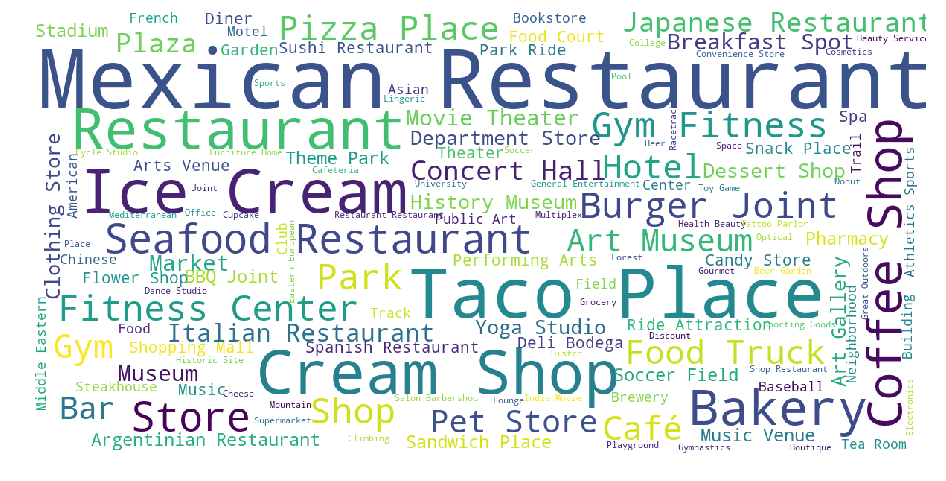

In [45]:
show_wordcloud(EatPrayLove_NorthAmerica_Mexico_VenuesClusters['Venue Category'])

<div class="alert alert-warning" role="alert">
    
  This **above** shows the most common venues in each city
  
</div>

##### Clustering neighborhoods and venues - South America: Sao Paulo, Brazil (The battle of Neighborhood) 

In [46]:
SaoPauloCity_grouped,neighborhoods_venues_sorted=AnalyzeNeighborhoods(EatPrayLove_SouthAmerica_SaoPaulo_VenuesClusters,10)
SaoPaulo_merged=createClusters(EatPrayLove_SouthAmerica_SaoPaulo_VenuesClusters,SaoPauloCity_grouped,SClusterName,kclusters,neighborhoods_venues_sorted)
dfc1,dfc2,dfc3,dfc4,dfc5,dfc6,dfc7=analyzeClusters(SaoPaulo_merged,SClusterName,SA_Cont,SA_Cnt,SA_Cname)
print("FINISHED SAO PAULO CLUSTERS' ANALYSIS")

FINISHED SAO PAULO CLUSTERS' ANALYSIS


In [47]:
SCity='Sao Paulo, Brazil'
SCityMap=getMapOfCity(SCity)
print (SCityMap)
map_clusters = folium.Map(location=[SCityMap.lat, SCityMap.lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SaoPaulo_merged['Venue Latitude'], SaoPaulo_merged['Venue Longitude'], SaoPaulo_merged['Venue'], SaoPaulo_merged[SClusterName]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save('SaoPauloClusters.html')

<[OK] Arcgis - Geocode [São Paulo]>


In [48]:
%%html
<iframe src="SaoPauloClusters.html"width="960" height="350"></iframe>

<div class="alert alert-warning" role="alert">
    
  This **above** map shows the clustering in each city
  
</div>

In [49]:
SaoPaulo_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,SaoPaulo_Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aricanduva,-23.56771,-46.51025,Sodiê Doces,-23.569948,-46.508913,Dessert Shop,2,Pizza Place,Dessert Shop,Bakery,Brazilian Restaurant,Gym,Ice Cream Shop,Japanese Restaurant,Pet Store,Italian Restaurant,Burger Joint
1,Aricanduva,-23.56771,-46.51025,Outback Steakhouse,-23.565113,-46.501645,Steakhouse,2,Pizza Place,Dessert Shop,Bakery,Brazilian Restaurant,Gym,Ice Cream Shop,Japanese Restaurant,Pet Store,Italian Restaurant,Burger Joint
2,Aricanduva,-23.56771,-46.51025,Yogoberry Original,-23.566435,-46.502766,Frozen Yogurt Shop,2,Pizza Place,Dessert Shop,Bakery,Brazilian Restaurant,Gym,Ice Cream Shop,Japanese Restaurant,Pet Store,Italian Restaurant,Burger Joint
3,Aricanduva,-23.56771,-46.51025,Burlina Pet Shop,-23.567432,-46.506863,Pet Store,2,Pizza Place,Dessert Shop,Bakery,Brazilian Restaurant,Gym,Ice Cream Shop,Japanese Restaurant,Pet Store,Italian Restaurant,Burger Joint
4,Aricanduva,-23.56771,-46.51025,Smart Fit,-23.564365,-46.503059,Gym / Fitness Center,2,Pizza Place,Dessert Shop,Bakery,Brazilian Restaurant,Gym,Ice Cream Shop,Japanese Restaurant,Pet Store,Italian Restaurant,Burger Joint


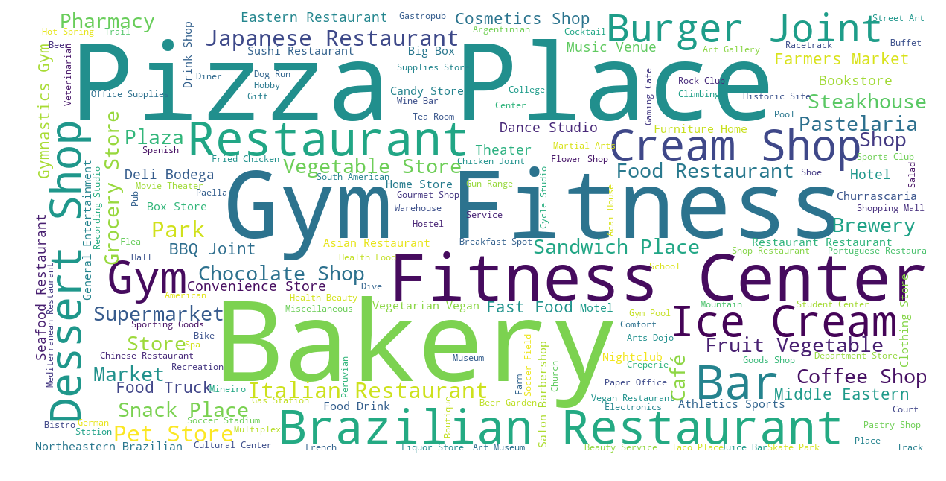

In [50]:
show_wordcloud(EatPrayLove_SouthAmerica_SaoPaulo_VenuesClusters['Venue Category'])

#####  Clustering neighborhoods and venues  - Asia: Tokyo, Japan (The battle of Neighborhood) 

In [51]:
Tokyo_grouped,neighborhoods_venues_sorted=AnalyzeNeighborhoods(EatPrayLove_Asia_Tokyo_VenuesClusters,10)
Tokyo_merged=createClusters(EatPrayLove_Asia_Tokyo_VenuesClusters,Tokyo_grouped,TClusterName,kclusters,neighborhoods_venues_sorted)
dfc1,dfc2,dfc3,dfc4,dfc5,dfc6,dfc7=analyzeClusters(Tokyo_merged,TClusterName,A_Cont,A_Cnt,A_Cname)
print("FINISHED TOKYO CLUSTERS' ANALYSIS")
clear_output()

In [52]:
# create map
TCity='Tokyo, Japan'
TCityMap=getMapOfCity(TCity)
print (TCityMap)
map_clusters = folium.Map(location=[TCityMap.lat, TCityMap.lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Tokyo_merged['Venue Latitude'], Tokyo_merged['Venue Longitude'], Tokyo_merged['Venue'], Tokyo_merged[TClusterName]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save('TokyoClusters.html')

<[OK] Arcgis - Geocode [Tokyo]>


In [53]:
%%html
<iframe src="TokyoClusters.html"width="960" height="350"></iframe>

In [54]:
Tokyo_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Tokyo_Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adachi City,35.774811,139.804537,Daiso (ダイソー),35.779725,139.811076,Discount Store,3,Ramen Restaurant,Café,Sake Bar,Dessert Shop,Japanese Restaurant,Supermarket,BBQ Joint,Convenience Store,Steakhouse,Spa
1,Adachi City,35.774811,139.804537,ふうりゅう,35.772296,139.797481,Noodle House,3,Ramen Restaurant,Café,Sake Bar,Dessert Shop,Japanese Restaurant,Supermarket,BBQ Joint,Convenience Store,Steakhouse,Spa
2,Adachi City,35.774811,139.804537,Tanaka Shoten (田中商店),35.784591,139.810894,Ramen Restaurant,3,Ramen Restaurant,Café,Sake Bar,Dessert Shop,Japanese Restaurant,Supermarket,BBQ Joint,Convenience Store,Steakhouse,Spa
3,Adachi City,35.774811,139.804537,Yakiniku King (焼肉きんぐ),35.770161,139.803289,BBQ Joint,3,Ramen Restaurant,Café,Sake Bar,Dessert Shop,Japanese Restaurant,Supermarket,BBQ Joint,Convenience Store,Steakhouse,Spa
4,Adachi City,35.774811,139.804537,どんどん 梅島店,35.778472,139.799713,BBQ Joint,3,Ramen Restaurant,Café,Sake Bar,Dessert Shop,Japanese Restaurant,Supermarket,BBQ Joint,Convenience Store,Steakhouse,Spa


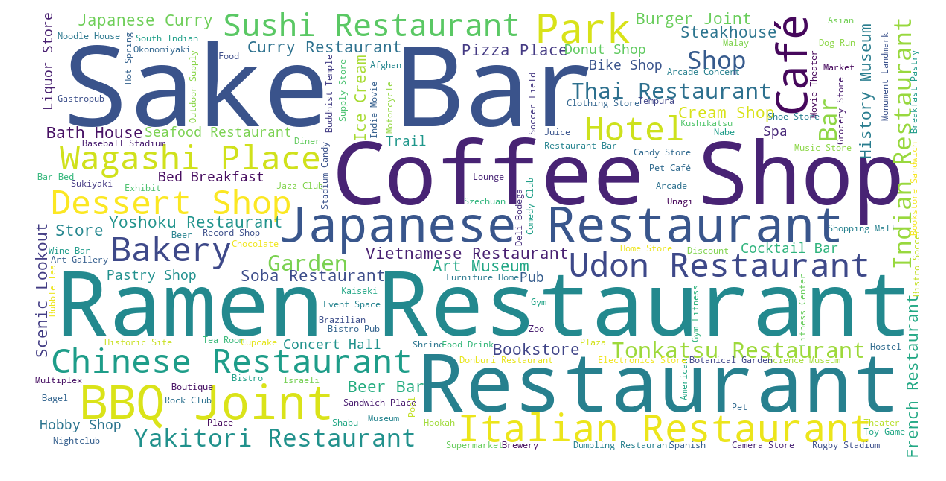

In [55]:
show_wordcloud(EatPrayLove_Asia_Tokyo_VenuesClusters['Venue Category'])

##### Clustering neighborhoods and venues  - Australia: Sydney, Australia (The battle of Neighborhood) 

In [56]:
Sydney_grouped,neighborhoods_venues_sorted=AnalyzeNeighborhoods(EatPrayLove_Australia_Sydney_VenuesClusters,10)
Sydney_merged=createClusters(EatPrayLove_Australia_Sydney_VenuesClusters,Sydney_grouped,SYClusterName,kclusters,neighborhoods_venues_sorted)
dfc1,dfc2,dfc3,dfc4,dfc5,dfc6,dfc7=analyzeClusters(Sydney_merged,SYClusterName,Aust_Cont,Aust_Cnt,Aust_Cname)
print("FINISHED SYDNEY CLUSTERS' ANALYSIS")

FINISHED SYDNEY CLUSTERS' ANALYSIS


In [57]:
# create map
SYCity='Sydney, Australia'
SYCityMap=getMapOfCity(SYCity)
print (SYCityMap)
map_clusters = folium.Map(location=[SYCityMap.lat, SYCityMap.lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Sydney_merged['Venue Latitude'], Sydney_merged['Venue Longitude'], Sydney_merged['Venue'], Sydney_merged[SYClusterName]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save('SydneyClusters.html')

<[OK] Arcgis - Geocode [Sydney, New South Wales]>


In [58]:
%%html
<iframe src="SydneyClusters.html"width="960" height="350"></iframe>

In [59]:
Sydney_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Sydney_Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayside,-33.984617,151.05119,Lugarno Gourmet Deli Cafe,-33.975714,151.047702,Deli / Bodega,4,Café,Grocery Store,Supermarket,Park,Train Station,Fast Food Restaurant,Sandwich Place,Pizza Place,Convenience Store,Shopping Mall
1,Bayside,-33.984617,151.05119,Oatley Park,-33.981036,151.060810,Park,4,Café,Grocery Store,Supermarket,Park,Train Station,Fast Food Restaurant,Sandwich Place,Pizza Place,Convenience Store,Shopping Mall
2,Bayside,-33.984617,151.05119,Edmonds & Greer,-33.980160,151.073924,Café,4,Café,Grocery Store,Supermarket,Park,Train Station,Fast Food Restaurant,Sandwich Place,Pizza Place,Convenience Store,Shopping Mall
3,Bayside,-33.984617,151.05119,Lugarno Seafood Restaurant,-33.990960,151.042120,Seafood Restaurant,4,Café,Grocery Store,Supermarket,Park,Train Station,Fast Food Restaurant,Sandwich Place,Pizza Place,Convenience Store,Shopping Mall
4,Bayside,-33.984617,151.05119,Como Pleasure Grounds,-33.997672,151.070224,Park,4,Café,Grocery Store,Supermarket,Park,Train Station,Fast Food Restaurant,Sandwich Place,Pizza Place,Convenience Store,Shopping Mall


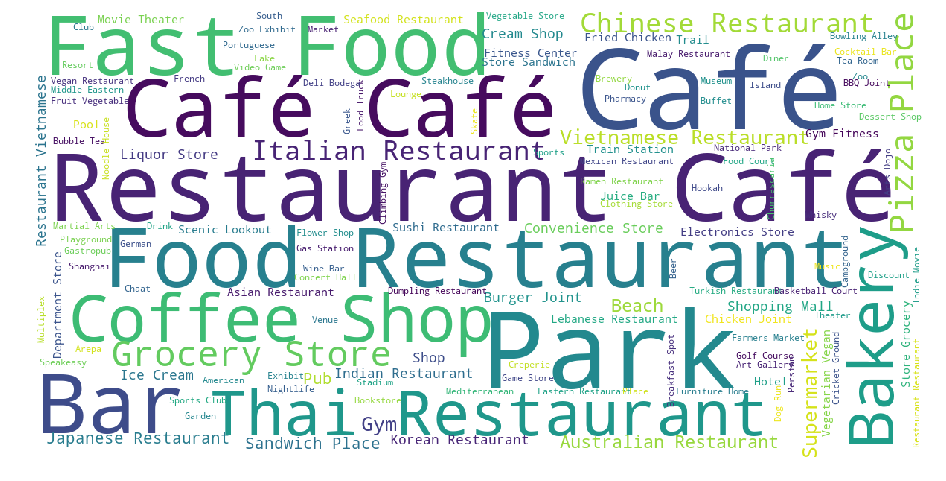

In [60]:
show_wordcloud(EatPrayLove_Australia_Sydney_VenuesClusters['Venue Category'])

##### Clustering neighborhoods and venues - Europe: Paris, France (The battle of Neighborhood) 

In [61]:
Paris_grouped,neighborhoods_venues_sorted=AnalyzeNeighborhoods(EatPrayLove_Europe_Paris_VenuesClusters,10)
Paris_merged=createClusters(EatPrayLove_Europe_Paris_VenuesClusters,Paris_grouped,PClusterName,kclusters,neighborhoods_venues_sorted)
dfc1,dfc2,dfc3,dfc4,dfc5,dfc6,dfc7=analyzeClusters(Paris_merged,PClusterName,Eur_Cont,Eur_Cnt,Eur_Cname)
print("FINISHED PARIS CLUSTERS' ANALYSIS")

FINISHED PARIS CLUSTERS' ANALYSIS


In [62]:
# create map
PCity='Paris, France'
PCityMap=getMapOfCity(PCity)
print (PCityMap)
map_clusters = folium.Map(location=[PCityMap.lat, PCityMap.lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Paris_merged['Venue Latitude'], Paris_merged['Venue Longitude'], Paris_merged['Venue'], Paris_merged[PClusterName]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save('ParisClusters.html')

<[OK] Arcgis - Geocode [Paris, Île-de-France]>


In [63]:
%%html
<iframe src="ParisClusters.html"width="960" height="350"></iframe>

In [64]:
Paris_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Paris_Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Louvre,48.8592,2.3417,Place du Louvre,48.859841,2.340822,Plaza,3,Plaza,Hotel,Art Museum,Wine Bar,French Restaurant,Bookstore,Historic Site,Sandwich Place,Japanese Restaurant,Garden
1,Louvre,48.8592,2.3417,Cour Carrée du Louvre,48.860360,2.338543,Pedestrian Plaza,3,Plaza,Hotel,Art Museum,Wine Bar,French Restaurant,Bookstore,Historic Site,Sandwich Place,Japanese Restaurant,Garden
2,Louvre,48.8592,2.3417,La Vénus de Milo (Vénus de Milo),48.859943,2.337234,Exhibit,3,Plaza,Hotel,Art Museum,Wine Bar,French Restaurant,Bookstore,Historic Site,Sandwich Place,Japanese Restaurant,Garden
3,Louvre,48.8592,2.3417,Musée du Louvre,48.860847,2.336440,Art Museum,3,Plaza,Hotel,Art Museum,Wine Bar,French Restaurant,Bookstore,Historic Site,Sandwich Place,Japanese Restaurant,Garden
4,Louvre,48.8592,2.3417,Chez Nous,48.855823,2.340271,Wine Bar,3,Plaza,Hotel,Art Museum,Wine Bar,French Restaurant,Bookstore,Historic Site,Sandwich Place,Japanese Restaurant,Garden


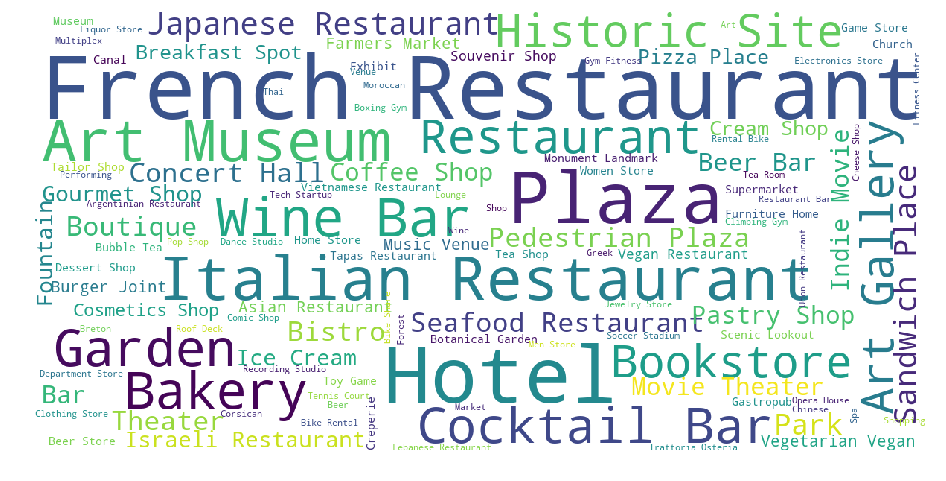

In [65]:
show_wordcloud(EatPrayLove_Europe_Paris_VenuesClusters['Venue Category'])

##### Clustering neighborhoods and venues - Africa: Greater Cairo, Egypt (The battle of Neighborhood) 

In [66]:
GreaterCairo_grouped,neighborhoods_venues_sorted=AnalyzeNeighborhoods(EatPrayLove_Africa_GreaterCairo_VenuesClusters,10)
GreaterCairo_merged=createClusters(EatPrayLove_Africa_GreaterCairo_VenuesClusters,GreaterCairo_grouped,CAClusterName,kclusters,neighborhoods_venues_sorted)
dfc1,dfc2,dfc3,dfc4,dfc5,dfc6,dfc7=analyzeClusters(GreaterCairo_merged,CAClusterName,Afr_Cont,Afr_Cnt,Afr_Cname)
print("FINISHED GREATER CAIRO CLUSTERS' ANALYSIS")

FINISHED GREATER CAIRO CLUSTERS' ANALYSIS


In [67]:
# create map
CCity='Greater Cairo, Egypt'
CCityMap=getMapOfCity(CCity)
print (CCityMap)
map_clusters = folium.Map(location=[CCityMap.lat, CCityMap.lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(GreaterCairo_merged['Venue Latitude'], GreaterCairo_merged['Venue Longitude'], GreaterCairo_merged['Venue'], GreaterCairo_merged[CAClusterName]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save('GreaterCairoClusters.html')

<[OK] Arcgis - Geocode [Greater Cairo Library]>


In [68]:
%%html
<iframe src="GreaterCairoClusters.html"width="960" height="350"></iframe>

GreaterCairo_merged.head()

show_wordcloud(EatPrayLove_Africa_GreaterCairo_VenuesClusters['Venue Category'])

##### Adding the results of clustering in one dataframe (The battle of Neighborhood) 

<div class="alert alert-warning" role="alert">
    
  The following dataframe will include the clusters in all cities and the corresponding number of venues
  
</div>

In [69]:
#The final results of the data preparation and collection
Clusters_Across_Continents_df['Continent']= dfc1
Clusters_Across_Continents_df['Country']= dfc2
Clusters_Across_Continents_df['City']= dfc3
Clusters_Across_Continents_df['Cluster Number']= dfc4
Clusters_Across_Continents_df['Number of Neighborhoods']=dfc5
Clusters_Across_Continents_df['Number of Venue Categories']=dfc6
Clusters_Across_Continents_df['Number of Venues']=dfc7
Clusters_Across_Continents_df

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues
0,North America,Mexico,Mexico City,1,1,24,50
1,North America,Mexico,Mexico City,2,2,77,200
2,North America,Mexico,Mexico City,3,4,105,400
3,North America,Mexico,Mexico City,4,2,68,200
4,North America,Mexico,Mexico City,5,7,135,700
5,South America,Brazil,Sao Paulo,1,9,141,765
6,South America,Brazil,Sao Paulo,2,1,3,3
7,South America,Brazil,Sao Paulo,3,13,181,1229
8,South America,Brazil,Sao Paulo,4,1,17,19
9,South America,Brazil,Sao Paulo,5,6,156,600


<div class="alert alert-warning" role="alert">
    
The following will **Sort** the dataframe containing clusters and corresponding venues THEN selecting the top cluster in each city THEN sort clusters descending (The battle of Neighborhood)  PLUS displaying the results
  
</div>
 

In [70]:
#Results
sorted_Clusters=Clusters_Across_Continents_df.sort_values(by=['Number of Venues','Number of Venue Categories'], ascending =False)
#Get the Cities to visit by order together with corresponding cluster
Cities_Sorted_byVenuesNumbers1=sorted_Clusters.copy()
Cities_Sorted_byVenuesNumbers1=Cities_Sorted_byVenuesNumbers1.drop_duplicates(subset='Country')


In [71]:
#print the results\
print('According to the BATTLE OF NEIGHBORHOOD - based on the Number of Venues AND corresponding Clusters, You can visit the following cities by the following order: ')
Cities_Sorted_byVenuesNumbers1

According to the BATTLE OF NEIGHBORHOOD - based on the Number of Venues AND corresponding Clusters, You can visit the following cities by the following order: 


,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues
7,South America,Brazil,Sao Paulo,3,13,181,1229
25,Africa,Egypt,Greater Cairo,1,12,67,1200
18,Australia,Australia,Sydney,4,10,126,1000
14,Asia,Japan,Tokyo,5,8,96,800
4,North America,Mexico,Mexico City,5,7,135,700
20,Europe,France,Paris,1,7,96,700


In [72]:
Cities_Sorted_byVenuesNumbers2=Cities_Sorted_byVenuesNumbers1.copy()
Cities_Sorted_byVenuesNumbers2.drop('Continent',axis=1, inplace=True)
Cities_Sorted_byVenuesNumbers2.drop('City',axis=1, inplace=True)
Cities_Sorted_byVenuesNumbers2.drop('Cluster Number',axis=1, inplace=True)
Cities_Sorted_byVenuesNumbers2.drop('Number of Venue Categories',axis=1, inplace=True)
Cities_Sorted_byVenuesNumbers2= Cities_Sorted_byVenuesNumbers2.sort_values(['Number of Venues'], ascending=False )
Cities_Sorted_byVenuesNumbers2.set_index('Country',inplace=True)

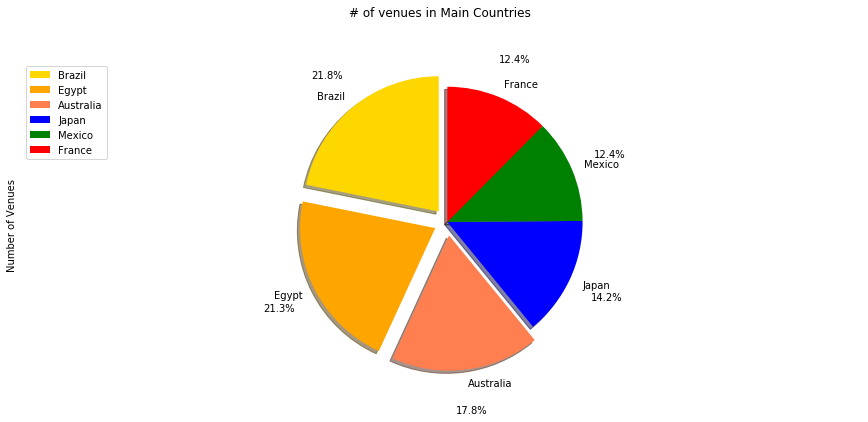

In [73]:
colors_list = ['gold', 'orange', 'coral', 'blue', 'green', 'red']
explode_list = [0.1, 0.1, 0.1, 0, 0, 0] # ratio for each continent with which to offset each wedge.

Cities_Sorted_byVenuesNumbers2['Number of Venues'].plot(kind='pie',
                                                                 figsize=(15, 6),
                                                                 autopct='%1.1f%%', 
                                                                 startangle=90,    
                                                                 shadow=True,
                                                                 pctdistance=1.3,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                                                                 colors=colors_list,  # add custom colors
                                                                 explode=explode_list # 'explode' lowest 3 continents
                                                                )

# scale the title up by 12% to match pctdistance
plt.title('# of venues in Main Countries', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=Cities_Sorted_byVenuesNumbers2.index, loc='upper left') 

plt.show()

<h3 id="item4-1"> Section (4.2) - Recommended Route 1-B - using total number of venues per city WITHOUT CLUSTERING - WITHOUT user's rating  </h3>


<div class="alert alert-warning" role="alert">
    
  This **section** will illustrate the recommended route using the total number of venues per city, without clustering the city and without the user ratings. It will sorting the dataframe containing  venues descending.
</div>

In [74]:
Clusters_Across_Continents_df_VISUALIZE=Clusters_Across_Continents_df.copy()
Clusters_Across_Continents_df_VISUALIZE = Clusters_Across_Continents_df_VISUALIZE.groupby('Country', axis=0).sum()

Clusters_Across_Continents_df_VISUALIZE.drop('Cluster Number',axis=1, inplace=True)
Clusters_Across_Continents_df_VISUALIZE.drop('Number of Venue Categories',axis=1, inplace=True)
Clusters_Across_Continents_df_VISUALIZE= Clusters_Across_Continents_df_VISUALIZE.sort_values(['Number of Venues'], ascending=False )
Clusters_Across_Continents_df_VISUALIZE

,Number of Neighborhoods,Number of Venues
Country,,
Australia,31,2759
Brazil,30,2616
Japan,23,2204
France,20,2000
Mexico,16,1550
Egypt,17,1533


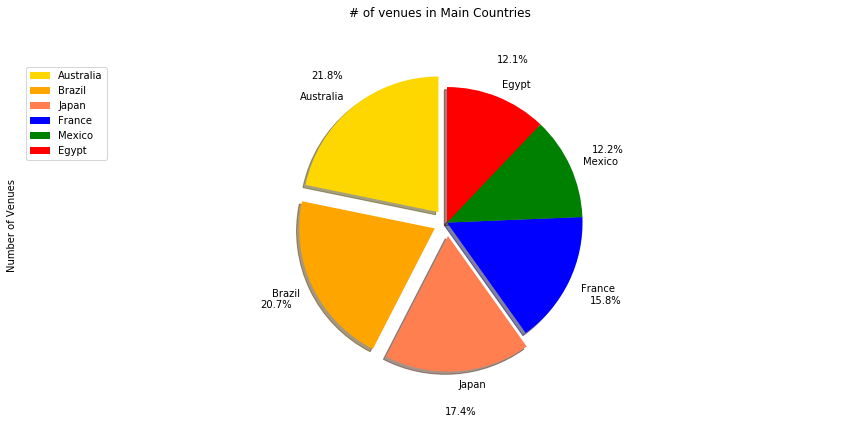

In [75]:
colors_list = ['gold', 'orange', 'coral', 'blue', 'green', 'red']
explode_list = [0.1, 0.1, 0.1, 0, 0, 0] # ratio for each continent with which to offset each wedge.

Clusters_Across_Continents_df_VISUALIZE['Number of Venues'].plot(kind='pie',
                                                                 figsize=(15, 6),
                                                                 autopct='%1.1f%%', 
                                                                 startangle=90,    
                                                                 shadow=True,
                                                                 pctdistance=1.3,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                                                                 colors=colors_list,  # add custom colors
                                                                 explode=explode_list # 'explode' lowest 3 continents
                                                                )

# scale the title up by 12% to match pctdistance
plt.title('# of venues in Main Countries', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=Clusters_Across_Continents_df_VISUALIZE.index, loc='upper left') 

plt.show()

<h3 id="item4-1"> Section (4.3) - Recommended Route 2-A - using total number of venues per city WITHOUT CLUSTERING - AND USING user's rating  </h3>

<div class="alert alert-warning" role="alert">
    
This **section** will illustrate the recommended route using the total number of venues per city, without clustering AND WITH user's rating for the three(3) defined criteria, in addition to adding the safety index and the happiness index per city
<div/>

In [76]:
Continent_Scores = pd.DataFrame(columns=['Continent Name', 'Country', 'City', 'Eat','Pray','Love'])
Continent=[]
Country=[]
City=[]
Eat=[]
Pray=[]
Love=[]

##### *Categorize venues in each city into three(3) criteria for Mexico City*

In [77]:
MexicoCity_VenueCateg_df_EPL=pd.DataFrame()
MexicoCity_VenueCateg_df_EPL=pd.merge(EatPrayLove_NorthAmerica_Mexico_VenuesClusters, VenuesCateg_EPL, on="Venue Category")
MexicoCity_VenueCateg_df_EPL = MexicoCity_VenueCateg_df_EPL.loc[(MexicoCity_VenueCateg_df_EPL ['EPL'] != 'Others')]
MexicoCity_VenueCateg_df_EPL.to_csv('Mexico_VenueCategories_EPL.csv')
MexicoCity_VenueCateg_df_EPL.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,EPL
21,Álvaro Obregón,19.38945,-99.19451,Paleteria y Neveria Lupita,19.401818,-99.199235,Ice Cream Shop,Eat
22,Álvaro Obregón,19.38945,-99.19451,Neverolandia,19.375743,-99.196785,Ice Cream Shop,Eat
23,Álvaro Obregón,19.38945,-99.19451,Chiandoni,19.386255,-99.176928,Ice Cream Shop,Eat
24,Álvaro Obregón,19.38945,-99.19451,Amor Casero,19.407301,-99.186104,Ice Cream Shop,Eat
25,Álvaro Obregón,19.38945,-99.19451,Nevería Roxy,19.408816,-99.176609,Ice Cream Shop,Eat


In [78]:
M=MexicoCity_VenueCateg_df_EPL.groupby('EPL').size().reset_index(name='count')
#adding the results to the lists 
Continent.append('North America')
Country.append('Mexico')
City.append('Mexico City')
Eat.append(M.loc[0].values[1])
Pray.append(M.loc[2].values[1])
Love.append(M.loc[1].values[1])

#####  *Categorize venues in each city into three(3) criteria for Sao Paulo*

In [79]:
SaoPaulo_VenueCateg_df_EPL=pd.DataFrame()
SaoPaulo_VenueCateg_df_EPL=pd.merge(EatPrayLove_SouthAmerica_SaoPaulo_VenuesClusters, VenuesCateg_EPL, on="Venue Category")
SaoPaulo_VenueCateg_df_EPL = SaoPaulo_VenueCateg_df_EPL.loc[(SaoPaulo_VenueCateg_df_EPL ['EPL'] != 'Others')]
SaoPaulo_VenueCateg_df_EPL.to_csv('SaoPaulo_VenueCategories_EPL.csv')
SaoPaulo_VenueCateg_df_EPL.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,EPL
0,Aricanduva,-23.56771,-46.51025,Sodiê Doces,-23.569948,-46.508913,Dessert Shop,Eat
1,Aricanduva,-23.56771,-46.51025,Doceria Ki Delicia,-23.550687,-46.534451,Dessert Shop,Eat
2,Aricanduva,-23.56771,-46.51025,Doceria Guibela,-23.552746,-46.504242,Dessert Shop,Eat
3,Aricanduva,-23.56771,-46.51025,Sodie Doces - Artur Alvim,-23.542724,-46.492826,Dessert Shop,Eat
4,Aricanduva,-23.56771,-46.51025,Mania de Açaí,-23.536761,-46.517858,Dessert Shop,Eat


In [80]:
S=SaoPaulo_VenueCateg_df_EPL.groupby('EPL').size().reset_index(name='count')
#adding the results to the lists 
Continent.append('South America')
Country.append('Brazil')
City.append('Sao Paulo')
Eat.append(S.loc[0].values[1])
Pray.append(S.loc[2].values[1])
Love.append(S.loc[1].values[1])

##### *Categorize venues in each city into three(3) criteria for Tokyo*

In [81]:
Tokyo_VenueCateg_df_EPL=pd.DataFrame()
Tokyo_VenueCateg_df_EPL=pd.merge(EatPrayLove_Asia_Tokyo_VenuesClusters, VenuesCateg_EPL, on="Venue Category")
Tokyo_VenueCateg_df_EPL = Tokyo_VenueCateg_df_EPL.loc[(Tokyo_VenueCateg_df_EPL ['EPL'] != 'Others')]
Tokyo_VenueCateg_df_EPL.to_csv('Tokyo_VenueCategories_EPL.csv')
Tokyo_VenueCateg_df_EPL.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,EPL
0,Adachi City,35.774811,139.804537,Daiso (ダイソー),35.779725,139.811076,Discount Store,Love
1,Adachi City,35.774811,139.804537,MEGA Don Quijote (MEGAドン・キホーテ 環七梅島店),35.778288,139.804967,Discount Store,Love
2,Katsushika City,35.743454,139.847229,Daiso (ダイソー),35.747065,139.857237,Discount Store,Love
3,Adachi City,35.774811,139.804537,ふうりゅう,35.772296,139.797481,Noodle House,Eat
4,Arakawa City,35.736093,139.783403,Szechuan Dandanmian Aun (四川担担麺 阿吽),35.706678,139.769807,Noodle House,Eat


In [82]:
T=Tokyo_VenueCateg_df_EPL.groupby('EPL').size().reset_index(name='count')
#adding the results to the lists 
Continent.append('Asia')
Country.append('Japan')
City.append('Tokyo')
Eat.append(T.loc[0].values[1])
Pray.append(T.loc[2].values[1])
Love.append(T.loc[1].values[1])

##### *Categorize venues in each city into three(3) criteria for Sydney*

In [83]:
Sydney_VenueCateg_df_EPL=pd.DataFrame()
Sydney_VenueCateg_df_EPL=pd.merge(EatPrayLove_Australia_Sydney_VenuesClusters, VenuesCateg_EPL, on="Venue Category")
Sydney_VenueCateg_df_EPL= Sydney_VenueCateg_df_EPL.loc[(Sydney_VenueCateg_df_EPL ['EPL'] != 'Others')]
Sydney_VenueCateg_df_EPL.to_csv('Sydney_VenueCategories_EPL.csv')
Sydney_VenueCateg_df_EPL.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,EPL
0,Bayside,-33.984617,151.051190,Lugarno Gourmet Deli Cafe,-33.975714,151.047702,Deli / Bodega,Eat
1,Canterbury-Bankstown,-33.934042,151.030229,Lugarno Gourmet Deli Cafe,-33.975714,151.047702,Deli / Bodega,Eat
2,Cumberland,-37.769460,144.961690,King & Godfree,-37.798574,144.967259,Deli / Bodega,Eat
3,Cumberland,-37.769460,144.961690,Brunswick Street Alimentari,-37.799921,144.978183,Deli / Bodega,Eat
4,Georges River,-33.983740,151.041520,Lugarno Gourmet Deli Cafe,-33.975714,151.047702,Deli / Bodega,Eat


In [84]:
A=Sydney_VenueCateg_df_EPL.groupby('EPL').size().reset_index(name='count')
#adding the results to the lists 
Continent.append('Australia')
Country.append('Australia')
City.append('Sydney')
Eat.append(A.loc[0].values[1])
Pray.append(A.loc[2].values[1])
Love.append(A.loc[1].values[1])

##### *Categorize venues in each city into three(3) criteria for Paris*

In [85]:
Paris_VenueCateg_df_EPL=pd.DataFrame()
Paris_VenueCateg_df_EPL=pd.merge(EatPrayLove_Europe_Paris_VenuesClusters, VenuesCateg_EPL, on="Venue Category")
Paris_VenueCateg_df_EPL= Paris_VenueCateg_df_EPL.loc[(Paris_VenueCateg_df_EPL ['EPL'] != 'Others')]
Paris_VenueCateg_df_EPL.to_csv('Paris_VenueCategories_EPL.csv')
Paris_VenueCateg_df_EPL.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,EPL
0,Louvre,48.8592,2.3417,Place du Louvre,48.859841,2.340822,Plaza,Pray
1,Louvre,48.8592,2.3417,Cour Napoléon,48.861172,2.335088,Plaza,Pray
2,Louvre,48.8592,2.3417,Place de l'Hôtel de Ville – Esplanade de la Li...,48.856925,2.351412,Plaza,Pray
3,Louvre,48.8592,2.3417,Place des Victoires,48.865759,2.341219,Plaza,Pray
4,Louvre,48.8592,2.3417,Place Saint-Germain-des-Prés,48.854183,2.333511,Plaza,Pray


In [86]:
P=Paris_VenueCateg_df_EPL.groupby('EPL').size().reset_index(name='count')
#adding the results to the lists 
Continent.append('Europe')
Country.append('France')
City.append('Paris')
Eat.append(P.loc[0].values[1])
Pray.append(P.loc[2].values[1])
Love.append(P.loc[1].values[1])

##### *Categorize venues in each city into three(3) criteria for Cairo*

In [87]:
Cairo_VenueCateg_df_EPL=pd.DataFrame()
Cairo_VenueCateg_df_EPL=pd.merge(EatPrayLove_Africa_GreaterCairo_VenuesClusters, VenuesCateg_EPL, on="Venue Category")
Cairo_VenueCateg_df_EPL= Cairo_VenueCateg_df_EPL.loc[(Cairo_VenueCateg_df_EPL ['EPL'] != 'Others')]
Cairo_VenueCateg_df_EPL.to_csv('Cairo_VenueCategories_EPL.csv')
Cairo_VenueCateg_df_EPL.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,EPL
0,Abbassia,30.07135,31.2830,Al Haakem Mosque (جامع الحاكم بامر الله),30.054612,31.263587,Mosque,Pray
1,Abbassia,30.07135,31.2830,Al Azhar Mosque (الجامع الأزهر),30.045970,31.262539,Mosque,Pray
2,Abbassia,30.07135,31.2830,Al Zaher Baibars Al Bunduqdari Mosque (جامع ال...,30.061063,31.264394,Mosque,Pray
3,Azbakeya,30.04992,31.2486,Al Azhar Mosque (الجامع الأزهر),30.045970,31.262539,Mosque,Pray
4,Azbakeya,30.04992,31.2486,Al Haakem Mosque (جامع الحاكم بامر الله),30.054612,31.263587,Mosque,Pray


In [88]:
C=Cairo_VenueCateg_df_EPL.groupby('EPL').size().reset_index(name='count')
#adding the results to the lists 
Continent.append('Africa')
Country.append('Egypt')
City.append('Greater Cairo')
Eat.append(C.loc[0].values[1])
Pray.append(C.loc[2].values[1])
Love.append(C.loc[1].values[1])

<div class="alert alert-warning" role="alert">
    
  This following dataframe will include the results of categorizing each city's venues into the recommender's three(3) defined criteria
<div/>

In [89]:
#The final results of the data preparation and collection
Continent_Scores['Continent Name']=Continent
Continent_Scores['Country']= Country
Continent_Scores['City']= City
Continent_Scores['Eat']= Eat
Continent_Scores['Pray']=Pray
Continent_Scores['Love']=Love
Continent_Scores

,Continent Name,Country,City,Eat,Pray,Love
0,North America,Mexico,Mexico City,941,346,144
1,South America,Brazil,Sao Paulo,1496,517,349
2,Asia,Japan,Tokyo,1508,290,225
3,Australia,Australia,Sydney,1370,438,413
4,Europe,France,Paris,922,644,311
5,Africa,Egypt,Greater Cairo,758,386,207


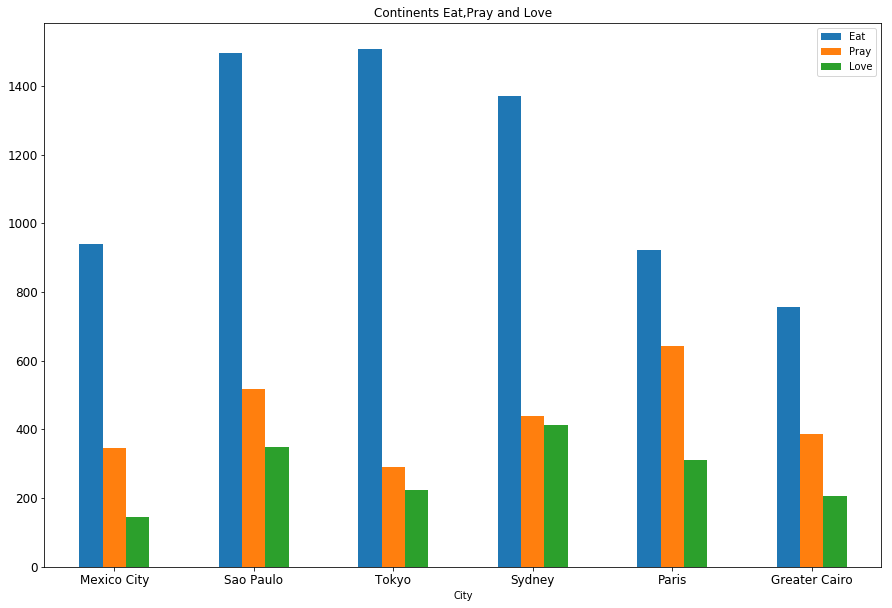

In [90]:
ay = Continent_Scores.plot.bar(x='City',rot=0,figsize=(15,10),title ="Continents Eat,Pray and Love",fontsize=12)

<div class="alert alert-danger" role="alert">
  The following is the user's rating for the three(3) defined criteria of the recommender model for Route 2-A and Route 2-B
</div>

In [91]:
#initializing the user profile with score for each of Eat, Pray and Love PREFERENCES
Columns=['Eat','Pray','Love']
#Now assigning a score on a scale from 1 to 5 for each preference
My_EPL_Eat_Preference=1
My_EPL_Pray_Preference=2
My_EPL_Love_Preference=4

My_EPL_Preferences = {'Eat': [My_EPL_Eat_Preference],
                      'Pray':[My_EPL_Pray_Preference],
                      'Love':[My_EPL_Love_Preference]
        }

My_EPL_Profile = pd.DataFrame(My_EPL_Preferences,columns= Columns)

print (My_EPL_Profile)

   Eat  Pray  Love
0    1     2     4


<div class="alert alert-danger" role="alert">
  The following is the NORMALIZATION of data to calculate the recommendation based on user's rating, happiness index and safety index.
</div>

In [92]:
#Normalize Eat, Pray and Love
Continent_Scores_Normalized=Continent_Scores.copy()
Continent_Scores_Normalized["Eat"] = Continent_Scores_Normalized["Eat"] / Continent_Scores_Normalized["Eat"].max()
Continent_Scores_Normalized["Pray"] = Continent_Scores_Normalized["Pray"] / Continent_Scores_Normalized["Pray"].max()
Continent_Scores_Normalized["Love"] = Continent_Scores_Normalized["Love"] / Continent_Scores_Normalized["Love"].max()
Continent_Scores_Normalized

#After normalized, putting it on 5 scale
Continent_Scores_Normalized["Eat"] = Continent_Scores_Normalized["Eat"] *5
Continent_Scores_Normalized["Pray"] = Continent_Scores_Normalized["Pray"] *5
Continent_Scores_Normalized["Love"] = Continent_Scores_Normalized["Love"] *5
Continent_Scores_Normalized

#After normalized, putting it on 5 scale
Continent_Scores_And_Factors1=Continent_Scores_And_Factors.copy()
Continent_Scores_And_Factors1["Safe-City-Score"] = Continent_Scores_And_Factors1["Safe-City-Score"] *0.05
Continent_Scores_And_Factors1["Happy-City-Score"] = Continent_Scores_And_Factors1["Happy-City-Score"] *0.05

#Continent_Scores_And_Factors

#merging the dataframes 
Continent_Scores_And_Factors1
Continent_Scores_1=Continent_Scores_Normalized.copy()
Continent_Scores_And_Factors_merge=pd.merge(Continent_Scores_1, Continent_Scores_And_Factors1, on=['City'])
#Continent_Scores_And_Factors_merge

In [93]:
Continent_Scores_Normalized.head()

,Continent Name,Country,City,Eat,Pray,Love
0,North America,Mexico,Mexico City,3.120027,2.686335,1.743341
1,South America,Brazil,Sao Paulo,4.960212,4.013975,4.225182
2,Asia,Japan,Tokyo,5.000000,2.251553,2.723971
3,Australia,Australia,Sydney,4.542440,3.400621,5.000000
4,Europe,France,Paris,3.057029,5.000000,3.765133


In [94]:
Continent_Scores_And_Factors1.head()

,City,Safe-City-Score,Happy-City-Score
0,Tokyo,4.600,3.686368
1,Sydney,4.395,4.566617
2,Paris,4.120,4.241418
3,Mexico City,3.080,4.167402
4,Sao Paulo,2.985,3.939194


In [95]:
Continent_Scores_And_Factors_merge.head()

,Continent Name,Country,City,Eat,Pray,Love,Safe-City-Score,Happy-City-Score
0,North America,Mexico,Mexico City,3.120027,2.686335,1.743341,3.080,4.167402
1,South America,Brazil,Sao Paulo,4.960212,4.013975,4.225182,2.985,3.939194
2,Asia,Japan,Tokyo,5.000000,2.251553,2.723971,4.600,3.686368
3,Australia,Australia,Sydney,4.542440,3.400621,5.000000,4.395,4.566617
4,Europe,France,Paris,3.057029,5.000000,3.765133,4.120,4.241418


In [96]:
Continent_Scores_OneUser=Continent_Scores_And_Factors_merge.copy()

In [97]:
#Trips route recommendations to largest city in each continent based on Eat,Pray,Love criteria + User preferences
#This is an illustration for one user 
EPL_EAT=My_EPL_Profile.loc[0].Eat
EPL_PRAY=My_EPL_Profile.loc[0].Pray
EPL_LOVE=My_EPL_Profile.loc[0].Love

#Total_Rating=EPL_EAT+EPL_PRAY+EPL_LOVE
Total_Rating=3

Continent_Scores_OneUser['CityScore']= (((Continent_Scores_OneUser['Eat'] + 
                                       Continent_Scores_OneUser['Pray'] + 
                                       Continent_Scores_OneUser['Love']))/15)*5

Continent_Scores_OneUser['MyScore']= (Continent_Scores_OneUser['Eat']* EPL_EAT/5 + 
                                       Continent_Scores_OneUser['Pray']* EPL_PRAY/5 + 
                                       Continent_Scores_OneUser['Love']* EPL_LOVE)/5

Continent_Scores_OneUser['FinalScore']= (Continent_Scores_OneUser['MyScore'] + 
                                         Continent_Scores_OneUser['Safe-City-Score'] + 
                                         Continent_Scores_OneUser['Happy-City-Score'])/3

In [98]:
Sorted_OneUser=Continent_Scores_OneUser.sort_values(by=['FinalScore', 'Continent Name'], ascending=False)

<div class="alert alert-danger" role="alert">
  The following is result of Route 2-A using the venues categories mapped to three(3) criteria PLUS user's rating PLUS happiness index PLUS safety index
</div>

In [99]:
print('According to your user profile and your rating for Eat, Pray and Love, You can visit the following cities by the following order: ')
Sorted_OneUser

According to your user profile and your rating for Eat, Pray and Love, You can visit the following cities by the following order: 


,Continent Name,Country,City,Eat,Pray,Love,Safe-City-Score,Happy-City-Score,CityScore,MyScore,FinalScore
3,Australia,Australia,Sydney,4.542440,3.400621,5.000000,4.395,4.566617,4.314354,4.453747,4.471788
4,Europe,France,Paris,3.057029,5.000000,3.765133,4.120,4.241418,3.940721,3.534388,3.965269
2,Asia,Japan,Tokyo,5.000000,2.251553,2.723971,4.600,3.686368,3.325175,2.559301,3.615223
1,South America,Brazil,Sao Paulo,4.960212,4.013975,4.225182,2.985,3.939194,4.399790,3.899672,3.607955
0,North America,Mexico,Mexico City,3.120027,2.686335,1.743341,3.080,4.167402,2.516568,1.734381,2.993928
5,Africa,Egypt,Greater Cairo,2.513263,2.996894,2.506053,2.430,2.548610,2.672070,2.345125,2.441245


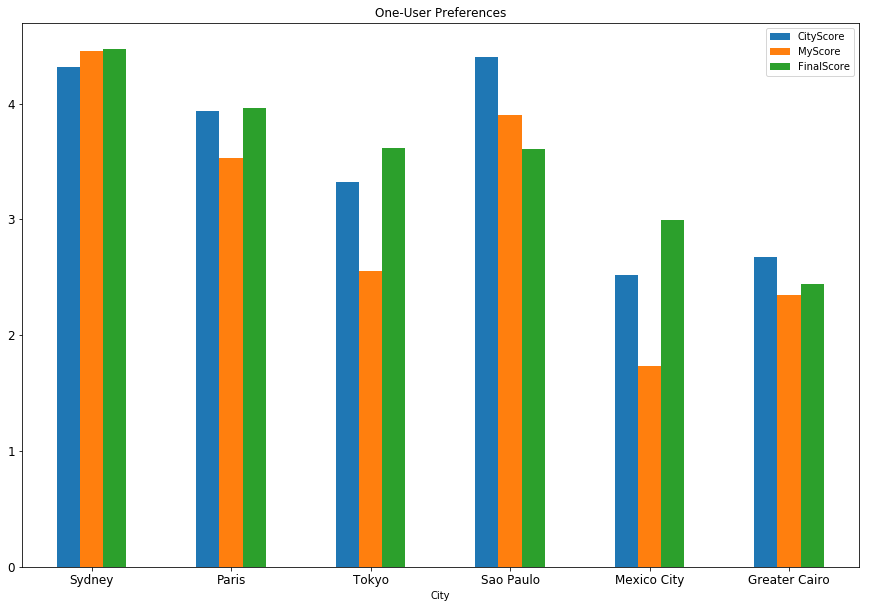

In [100]:
OneUser_df=Sorted_OneUser.copy()
OneUser_df.drop('Eat',axis=1, inplace=True)
OneUser_df.drop('Pray',axis=1, inplace=True)
OneUser_df.drop('Love',axis=1, inplace=True)
OneUser_df.drop('Happy-City-Score',axis=1, inplace=True)
OneUser_df.drop('Safe-City-Score',axis=1, inplace=True)
OneUser = OneUser_df.plot.bar(x='City',rot=0,figsize=(15,10),title ="One-User Preferences",fontsize=12)
#print the results\


<h3 id="item4-1"> Section (4.4) - Recommended Route 2-B - using total number of venues per city WITH CLUSTERING - AND USING user's rating  </h3>


<div class="alert alert-warning" role="alert">
    
This **section** will illustrate the recommended route using the total number of venues per city, WITH clustering AND WITH user's rating for the three(3) defined criteria, in addition to adding the safety index and the happiness index per city
<div/>

In [101]:
#LISTS TO ADD THE RESULTS OF CLUSTERING TO @The Recommender
#Initialize clusters to include the results of the Datafame @The battle of neighborhood
FinalClusterColumns=['Continent','Country','City','Cluster Number','Number of Neighborhoods','Number of Venue Categories', 'Number of Venues']
CContinent=[]
CCountry=[]
CCity=[]
CNumber=[]
CNeighboors=[]
CVen=[]
CTotalVenues=[]
Clusters_Across_Continents_df=pd.DataFrame({'Continent':CContinent,
                                            'Country':CCountry,
                                            'City':CCity,
                                            'Cluster Number':CNumber,
                                            'Number of Neighborhoods':CNeighboors,
                                            'Number of Venue Categories':CVen,
                                            'Number of Venues':CTotalVenues})
dfc11=[]
dfc12=[]
dfc13=[]
dfc14=[]
dfc15=[]
dfc16=[]
dfc17=[]


##### Mexico City - using defined categories for venues per city per and applying CLUSTERING PLUS user's rating

In [102]:
MexicoCity_VenueCateg_df_EPL['Venue Category']=MexicoCity_VenueCateg_df_EPL['EPL']
MexicoCity_VenueCateg_df_EPL.head()
MexicoCity_grouped_epl,MexicoCity_neighborhoods_venues_sorted_epl=AnalyzeNeighborhoods(MexicoCity_VenueCateg_df_EPL,3)
MexicoCity_merged_epl=createClusters(MexicoCity_VenueCateg_df_EPL,
                                     MexicoCity_grouped_epl,
                                     MClusterName,
                                     kclusters,
                                     MexicoCity_neighborhoods_venues_sorted_epl)

MexicoCity_merged_epl.drop('EPL',axis=1, inplace=True)
#MexicoCity_merged_epl.drop('Continent',axis=1, inplace=True)
#MexicoCity_merged_epl.drop('Country',axis=1, inplace=True)
#MexicoCity_merged_epl.drop('City',axis=1, inplace=True)

MexicoCity_df=MexicoCity_merged_epl.groupby(['MexicoCity_Clusters','Venue Category']).size().reset_index(name='count')

MexicoCity_df = MexicoCity_df.rename(columns={'MexicoCity_Clusters': 'Cluster Number'})
MexicoCity_df['Cluster Number']=MexicoCity_df['Cluster Number']+1
MexicoCity_res = MexicoCity_df.pivot(index='Cluster Number', columns='Venue Category', values='count')
MexicoCity_res.reset_index(0)
MexicoCity_res.insert(0, 'City', NA_Cname)
dfc11,dfc12,dfc13,dfc14,dfc15,dfc16,dfc17=analyzeClusters(MexicoCity_merged_epl,MClusterName,NA_Cont,NA_Cnt,NA_Cname)
print("FINISHED Mexico City CLUSTERS' ANALYSIS")
#dfc11,dfc12,dfc13,dfc14,dfc15,dfc16,dfc17

FINISHED Mexico City CLUSTERS' ANALYSIS


In [103]:
# create map
MCity='Mexico City, Mexico'
MCityMap=getMapOfCity(MCity)
print (MCityMap)
map_clusters = folium.Map(location=[MCityMap.lat, MCityMap.lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(MexicoCity_merged_epl['Venue Latitude'], MexicoCity_merged['Venue Longitude'], MexicoCity_merged['Venue'], MexicoCity_merged[MClusterName]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save('MexicoClusters0.html')

<[OK] Arcgis - Geocode [Mexico City, Cuauhtémoc, Mexico City]>


In [104]:
%%html
<iframe src="MexicoClusters0.html"width="960" height="350"></iframe>

##### Sao Paulo - using defined categories for venues per city per and applying CLUSTERING PLUS user's rating

In [105]:
SaoPaulo_VenueCateg_df_EPL['Venue Category']=SaoPaulo_VenueCateg_df_EPL['EPL']
SaoPaulo_VenueCateg_df_EPL.head()
SaoPaulo_grouped_epl,SaoPaulo_neighborhoods_venues_sorted_epl=AnalyzeNeighborhoods(SaoPaulo_VenueCateg_df_EPL,3)
SaoPaulo_merged_epl=createClusters(SaoPaulo_VenueCateg_df_EPL,
                                   SaoPaulo_grouped_epl,
                                   SClusterName,
                                   kclusters,
                                   SaoPaulo_neighborhoods_venues_sorted_epl)

SaoPaulo_merged_epl.drop('EPL',axis=1, inplace=True)
#SaoPaulo_merged_epl.drop('Continent',axis=1, inplace=True)
#SaoPaulo_merged_epl.drop('Country',axis=1, inplace=True)
#SaoPaulo_merged_epl.drop('City',axis=1, inplace=True)

SaoPaulo_df=SaoPaulo_merged_epl.groupby(['SaoPaulo_Clusters','Venue Category']).size().reset_index(name='count')

SaoPaulo_df = SaoPaulo_df.rename(columns={'SaoPaulo_Clusters': 'Cluster Number'})
SaoPaulo_df['Cluster Number']=SaoPaulo_df['Cluster Number']+1
SaoPaulo_res = SaoPaulo_df.pivot(index='Cluster Number', columns='Venue Category', values='count')
SaoPaulo_res.reset_index(0)
#print(SaoPaulo_res)
SaoPaulo_res.insert(0, 'City', SA_Cname)
dfc11,dfc12,dfc13,dfc14,dfc15,dfc16,dfc17=analyzeClusters(SaoPaulo_merged_epl,SClusterName,SA_Cont,SA_Cnt,SA_Cname)
print("FINISHED SaoPaulo CLUSTERS' ANALYSIS")

FINISHED SaoPaulo CLUSTERS' ANALYSIS


In [106]:
SCity='Sao Paulo, Brazil'
SCityMap=getMapOfCity(SCity)
print (SCityMap)
map_clusters = folium.Map(location=[SCityMap.lat, SCityMap.lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SaoPaulo_merged_epl['Venue Latitude'], SaoPaulo_merged['Venue Longitude'], SaoPaulo_merged['Venue'], SaoPaulo_merged[SClusterName]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save('SaoPauloClusters0.html')

<[OK] Arcgis - Geocode [São Paulo]>


In [107]:
%%html
<iframe src="SaoPauloClusters0.html"width="960" height="350"></iframe>

##### Tokyo - using defined categories for venues per city per and applying CLUSTERING PLUS user's rating

In [108]:
Tokyo_VenueCateg_df_EPL['Venue Category']=Tokyo_VenueCateg_df_EPL['EPL']
Tokyo_VenueCateg_df_EPL.head()
Tokyo_grouped_epl,Tokyo_neighborhoods_venues_sorted_epl=AnalyzeNeighborhoods(Tokyo_VenueCateg_df_EPL,3)
Tokyo_merged_epl=createClusters(Tokyo_VenueCateg_df_EPL,
                                Tokyo_grouped_epl,
                                TClusterName,
                                kclusters,
                                Tokyo_neighborhoods_venues_sorted_epl)

Tokyo_merged_epl.drop('EPL',axis=1, inplace=True)
#Tokyo_merged_epl.drop('Continent',axis=1, inplace=True)
#Tokyo_merged_epl.drop('Country',axis=1, inplace=True)
#Tokyo_merged_epl.drop('City',axis=1, inplace=True)

Tokyo_df=Tokyo_merged_epl.groupby(['Tokyo_Clusters','Venue Category']).size().reset_index(name='count')

Tokyo_df = Tokyo_df.rename(columns={'Tokyo_Clusters': 'Cluster Number'})
Tokyo_df['Cluster Number']=Tokyo_df['Cluster Number']+1
Tokyo_res = Tokyo_df.pivot(index='Cluster Number', columns='Venue Category', values='count')
Tokyo_res.reset_index(0)
Tokyo_res.insert(0, 'City', A_Cname)
dfc11,dfc12,dfc13,dfc14,dfc15,dfc16,dfc17=analyzeClusters(Tokyo_merged_epl,TClusterName,A_Cont,A_Cnt,A_Cname)
print("FINISHED TOKYO CLUSTERS' ANALYSIS")

FINISHED TOKYO CLUSTERS' ANALYSIS


In [109]:
# create map
TCity='Tokyo, Japan'
TCityMap=getMapOfCity(TCity)
print (TCityMap)
map_clusters = folium.Map(location=[TCityMap.lat, TCityMap.lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Tokyo_merged_epl['Venue Latitude'], Tokyo_merged['Venue Longitude'], Tokyo_merged['Venue'], Tokyo_merged[TClusterName]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save('TokyoClusters0.html')

<[OK] Arcgis - Geocode [Tokyo]>


In [110]:
%%html
<iframe src="TokyoClusters0.html"width="960" height="350"></iframe>

##### Sydney - using defined categories for venues per city per and applying CLUSTERING PLUS user's rating

In [111]:
Sydney_VenueCateg_df_EPL['Venue Category']=Sydney_VenueCateg_df_EPL['EPL']
Sydney_VenueCateg_df_EPL.head()
Sydney_grouped_epl,Sydney_neighborhoods_venues_sorted_epl=AnalyzeNeighborhoods(Sydney_VenueCateg_df_EPL,3)
Sydney_merged_epl=createClusters(Sydney_VenueCateg_df_EPL,
                                 Sydney_grouped_epl,
                                 SYClusterName,
                                 kclusters,
                                 Sydney_neighborhoods_venues_sorted_epl)

Sydney_merged_epl.drop('EPL',axis=1, inplace=True)
#Sydney_merged_epl.drop('Continent',axis=1, inplace=True)
#Sydney_merged_epl.drop('Country',axis=1, inplace=True)
#Sydney_merged_epl.drop('City',axis=1, inplace=True)

Sydney_df=Sydney_merged_epl.groupby(['Sydney_Clusters','Venue Category']).size().reset_index(name='count')

Sydney_df = Sydney_df.rename(columns={'Sydney_Clusters': 'Cluster Number'})
Sydney_df['Cluster Number']=Sydney_df['Cluster Number']+1
Sydney_res = Sydney_df.pivot(index='Cluster Number', columns='Venue Category', values='count')
Sydney_res.reset_index(0)
Sydney_res.insert(0, 'City', Aust_Cname)
dfc11,dfc12,dfc13,dfc14,dfc15,dfc16,dfc17=analyzeClusters(Sydney_merged_epl,SYClusterName,Aust_Cont,Aust_Cnt,Aust_Cname)
print("FINISHED SYDNEY CLUSTERS' ANALYSIS")

FINISHED SYDNEY CLUSTERS' ANALYSIS


In [112]:
# create map
SYCity='Sydney, Australia'
SYCityMap=getMapOfCity(SYCity)
print (SYCityMap)
map_clusters = folium.Map(location=[SYCityMap.lat, SYCityMap.lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Sydney_merged_epl['Venue Latitude'], Sydney_merged['Venue Longitude'], Sydney_merged['Venue'], Sydney_merged[SYClusterName]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save('SydneyClusters0.html')

<[OK] Arcgis - Geocode [Sydney, New South Wales]>


In [113]:
%%html
<iframe src="SydneyClusters0.html"width="960" height="350"></iframe>

##### Paris - using defined categories for venues per city per and applying CLUSTERING PLUS user's rating

In [114]:
Paris_VenueCateg_df_EPL['Venue Category']=Paris_VenueCateg_df_EPL['EPL']
Paris_VenueCateg_df_EPL.head()
Paris_grouped_epl,Paris_neighborhoods_venues_sorted_epl=AnalyzeNeighborhoods(Paris_VenueCateg_df_EPL,3)
Paris_merged_epl=createClusters(Paris_VenueCateg_df_EPL,
                                Paris_grouped_epl,
                                PClusterName,
                                kclusters,
                                Paris_neighborhoods_venues_sorted_epl)

Paris_merged_epl.drop('EPL',axis=1, inplace=True)
#GreaterCairo_merged_epl.head()
#Paris_merged_epl.drop('Continent',axis=1, inplace=True)
#Paris_merged_epl.drop('Country',axis=1, inplace=True)
#Paris_merged_epl.drop('City',axis=1, inplace=True)
#GreaterCairo_merged_epl.head()
Paris_df=Paris_merged_epl.groupby(['Paris_Clusters','Venue Category']).size().reset_index(name='count')
#df.info()
#df
Paris_df = Paris_df.rename(columns={'Paris_Clusters': 'Cluster Number'})
Paris_df['Cluster Number']=Paris_df['Cluster Number']+1
Paris_res = Paris_df.pivot(index='Cluster Number', columns='Venue Category', values='count')
Paris_res.reset_index(0)
#print(Paris_res)
Paris_res.insert(0, 'City', Eur_Cname)
dfc11,dfc12,dfc13,dfc14,dfc15,dfc16,dfc17=analyzeClusters(Paris_merged_epl,PClusterName,Eur_Cont,Eur_Cnt,Eur_Cname)
print("FINISHED PARIS CLUSTERS' ANALYSIS")

FINISHED PARIS CLUSTERS' ANALYSIS


In [115]:
# create map
PCity='Paris, France'
PCityMap=getMapOfCity(PCity)
print (PCityMap)
map_clusters = folium.Map(location=[PCityMap.lat, PCityMap.lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Paris_merged_epl['Venue Latitude'], Paris_merged['Venue Longitude'], Paris_merged['Venue'], Paris_merged[PClusterName]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save('ParisClusters0.html')

<[OK] Arcgis - Geocode [Paris, Île-de-France]>


In [116]:
%%html
<iframe src="ParisClusters0.html"width="960" height="350"></iframe>

##### Cairo - using defined categories for venues per city per and applying CLUSTERING PLUS user's rating

In [117]:
Cairo_VenueCateg_df_EPL['Venue Category']=Cairo_VenueCateg_df_EPL['EPL']
Cairo_VenueCateg_df_EPL.head()

GreaterCairo_grouped_epl,Cairo_neighborhoods_venues_sorted_epl=AnalyzeNeighborhoods(Cairo_VenueCateg_df_EPL,3)
GreaterCairo_merged_epl=createClusters(Cairo_VenueCateg_df_EPL,
                                       GreaterCairo_grouped_epl,
                                       CAClusterName,
                                       kclusters,
                                       Cairo_neighborhoods_venues_sorted_epl)


GreaterCairo_merged_epl.drop('EPL',axis=1, inplace=True)
#GreaterCairo_merged_epl.head()
#GreaterCairo_merged_epl.drop('Continent',axis=1, inplace=True)
#GreaterCairo_merged_epl.drop('Country',axis=1, inplace=True)
#GreaterCairo_merged_epl.drop('City',axis=1, inplace=True)
#GreaterCairo_merged_epl.head() 
Cairo_df=GreaterCairo_merged_epl.groupby(['GreaterCairo_Clusters','Venue Category']).size().reset_index(name='count')

Cairo_df = Cairo_df.rename(columns={'GreaterCairo_Clusters': 'Cluster Number'})
Cairo_df['Cluster Number']=Cairo_df['Cluster Number']+1
Cairo_res = Cairo_df.pivot(index='Cluster Number', columns='Venue Category', values='count')
Cairo_res.reset_index(0)
#print(Cairo_res)
Cairo_res.insert(0, 'City', Afr_Cname)
dfc11,dfc12,dfc13,dfc14,dfc15,dfc16,dfc17=analyzeClusters(GreaterCairo_merged_epl,CAClusterName,Afr_Cont,Afr_Cnt,Afr_Cname)
print("FINISHED GREATER CAIRO CLUSTERS' ANALYSIS")

FINISHED GREATER CAIRO CLUSTERS' ANALYSIS


In [118]:
# create map
CCity='Greater Cairo, Egypt'
CCityMap=getMapOfCity(CCity)
print (CCityMap)
map_clusters = folium.Map(location=[CCityMap.lat, CCityMap.lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(GreaterCairo_merged_epl['Venue Latitude'], GreaterCairo_merged['Venue Longitude'], GreaterCairo_merged['Venue'], GreaterCairo_merged[CAClusterName]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save('GreaterCairoClusters0.html')

<[OK] Arcgis - Geocode [Greater Cairo Library]>


In [119]:
%%html
<iframe src="GreaterCairoClusters0.html"width="960" height="350"></iframe>

<div class="alert alert-warning" role="alert">
    
  The following dataframe will include the results of categorizing each city's venues per CLUSTER into the recommender's three(3) defined criteria. It will also include Data NORMALIZATION and Feature Engineering (i.e. fillna)
<div/>

In [120]:
#The final results of the data preparation and collection
Clusters_Across_Continents1_df=pd.DataFrame()
Clusters_Across_Continents1_df['Continent']= dfc11
Clusters_Across_Continents1_df['Country']= dfc12
Clusters_Across_Continents1_df['City']= dfc13
Clusters_Across_Continents1_df['Cluster Number']= dfc14
Clusters_Across_Continents1_df['Number of Neighborhoods']=dfc15
Clusters_Across_Continents1_df['Number of Venue Categories']=dfc16
Clusters_Across_Continents1_df['Number of Venues']=dfc17

In [121]:
final_EPL_merge_result=pd.DataFrame()
#final_EPL_merge_result=Clusters_Across_Continents_df.merge(MexicoCity_res,on=['City', 'Cluster Number']).merge(SaoPaulo_res,on=['City', 'Cluster Number']).merge(Sydney_res,on=['City', 'Cluster Number']).merge(Tokyo_res,on=['City', 'Cluster Number']).merge(Paris_res,on=['City', 'Cluster Number']).merge(Cairo_res,on=['City', 'Cluster Number'])
#final_EPL_merge_result
final_EPL_merge_result_1=pd.merge(Clusters_Across_Continents1_df, MexicoCity_res, on=['City', 'Cluster Number'])
final_EPL_merge_result_1.fillna(0, inplace=True)

final_EPL_merge_result_2=pd.merge(Clusters_Across_Continents1_df, SaoPaulo_res, on=['City', 'Cluster Number'])
final_EPL_merge_result_2.fillna(0, inplace=True)


final_EPL_merge_result_3=pd.merge(Clusters_Across_Continents1_df, Sydney_res, on=['City', 'Cluster Number'])
final_EPL_merge_result_3.fillna(0, inplace=True)


final_EPL_merge_result_4=pd.merge(Clusters_Across_Continents1_df, Tokyo_res, on=['City', 'Cluster Number'])
final_EPL_merge_result_4.fillna(0, inplace=True)


final_EPL_merge_result_5=pd.merge(Clusters_Across_Continents1_df, Paris_res, on=['City', 'Cluster Number'])
final_EPL_merge_result_5.fillna(0, inplace=True)


final_EPL_merge_result_6=pd.merge(Clusters_Across_Continents1_df, Cairo_res, on=['City', 'Cluster Number'])
final_EPL_merge_result_6.fillna(0, inplace=True)



In [122]:
final_EPL_merge_result_1

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray
0,North America,Mexico,Mexico City,1,5,3,418,257,38,123
1,North America,Mexico,Mexico City,2,3,3,285,223,27,35
2,North America,Mexico,Mexico City,3,3,3,269,145,30,94
3,North America,Mexico,Mexico City,4,4,3,371,259,31,81
4,North America,Mexico,Mexico City,5,1,3,88,57,18,13


In [123]:
final_EPL_merge_result_2

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray
0,South America,Brazil,Sao Paulo,1,14,3,1245,840.0,171.0,234.0
1,South America,Brazil,Sao Paulo,2,1,1,2,2.0,0.0,0.0
2,South America,Brazil,Sao Paulo,3,4,3,263,142.0,46.0,75.0
3,South America,Brazil,Sao Paulo,4,5,3,463,282.0,43.0,138.0
4,South America,Brazil,Sao Paulo,5,6,3,389,230.0,89.0,70.0


In [124]:
final_EPL_merge_result_3

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray
0,Australia,Australia,Sydney,1,11,3,862,567,115,180
1,Australia,Australia,Sydney,2,4,3,164,62,49,53
2,Australia,Australia,Sydney,3,8,3,550,318,162,70
3,Australia,Australia,Sydney,4,4,3,303,161,45,97
4,Australia,Australia,Sydney,5,4,3,342,262,42,38


In [125]:
final_EPL_merge_result_4

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray
0,Asia,Japan,Tokyo,1,3,3,276,174,50,52
1,Asia,Japan,Tokyo,2,3,3,268,207,39,22
2,Asia,Japan,Tokyo,3,9,3,832,630,72,130
3,Asia,Japan,Tokyo,4,3,3,275,233,18,24
4,Asia,Japan,Tokyo,5,4,3,372,264,46,62


In [126]:
final_EPL_merge_result_5

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray
0,Europe,France,Paris,1,3,3,284,148,42,94
1,Europe,France,Paris,2,3,3,283,98,63,122
2,Europe,France,Paris,3,6,3,556,355,60,141
3,Europe,France,Paris,4,5,3,467,203,72,192
4,Europe,France,Paris,5,3,3,287,118,74,95


In [127]:
final_EPL_merge_result_6

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray
0,Africa,Egypt,Greater Cairo,1,1,3,75,55,14,6
1,Africa,Egypt,Greater Cairo,2,12,3,1090,587,156,347
2,Africa,Egypt,Greater Cairo,3,2,3,92,54,20,18
3,Africa,Egypt,Greater Cairo,4,1,3,4,2,1,1
4,Africa,Egypt,Greater Cairo,5,1,3,90,60,16,14


<div class="alert alert-warning" role="alert">
    
  Adding the safety index and happiness index for each city
<div/>

In [128]:
Continent_Scores_And_Factors2=Continent_Scores_And_Factors.copy()
Continent_Scores_And_Factors2["Safe-City-Score"] = Continent_Scores_And_Factors2["Safe-City-Score"] *0.05
Continent_Scores_And_Factors2["Happy-City-Score"] = Continent_Scores_And_Factors2["Happy-City-Score"] *0.05
Continent_Scores_And_Factors2

,City,Safe-City-Score,Happy-City-Score
0,Tokyo,4.600,3.686368
1,Sydney,4.395,4.566617
2,Paris,4.120,4.241418
3,Mexico City,3.080,4.167402
4,Sao Paulo,2.985,3.939194
5,Greater Cairo,2.430,2.548610


In [129]:
final_EPL_norm_result_1=pd.merge(final_EPL_merge_result_1, Continent_Scores_And_Factors2, on=['City'])
final_EPL_norm_result_2=pd.merge(final_EPL_merge_result_2, Continent_Scores_And_Factors2, on=['City'])
final_EPL_norm_result_3=pd.merge(final_EPL_merge_result_3, Continent_Scores_And_Factors2, on=['City'])
final_EPL_norm_result_4=pd.merge(final_EPL_merge_result_4, Continent_Scores_And_Factors2, on=['City'])
final_EPL_norm_result_5=pd.merge(final_EPL_merge_result_5, Continent_Scores_And_Factors2, on=['City'])
final_EPL_norm_result_6=pd.merge(final_EPL_merge_result_6, Continent_Scores_And_Factors2, on=['City'])

In [130]:
final_EPL_norm_result_1

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray,Safe-City-Score,Happy-City-Score
0,North America,Mexico,Mexico City,1,5,3,418,257,38,123,3.08,4.167402
1,North America,Mexico,Mexico City,2,3,3,285,223,27,35,3.08,4.167402
2,North America,Mexico,Mexico City,3,3,3,269,145,30,94,3.08,4.167402
3,North America,Mexico,Mexico City,4,4,3,371,259,31,81,3.08,4.167402
4,North America,Mexico,Mexico City,5,1,3,88,57,18,13,3.08,4.167402


In [131]:
final_EPL_norm_result_2

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray,Safe-City-Score,Happy-City-Score
0,South America,Brazil,Sao Paulo,1,14,3,1245,840.0,171.0,234.0,2.985,3.939194
1,South America,Brazil,Sao Paulo,2,1,1,2,2.0,0.0,0.0,2.985,3.939194
2,South America,Brazil,Sao Paulo,3,4,3,263,142.0,46.0,75.0,2.985,3.939194
3,South America,Brazil,Sao Paulo,4,5,3,463,282.0,43.0,138.0,2.985,3.939194
4,South America,Brazil,Sao Paulo,5,6,3,389,230.0,89.0,70.0,2.985,3.939194


In [132]:
final_EPL_norm_result_3

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray,Safe-City-Score,Happy-City-Score
0,Australia,Australia,Sydney,1,11,3,862,567,115,180,4.395,4.566617
1,Australia,Australia,Sydney,2,4,3,164,62,49,53,4.395,4.566617
2,Australia,Australia,Sydney,3,8,3,550,318,162,70,4.395,4.566617
3,Australia,Australia,Sydney,4,4,3,303,161,45,97,4.395,4.566617
4,Australia,Australia,Sydney,5,4,3,342,262,42,38,4.395,4.566617


In [133]:
final_EPL_norm_result_4

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray,Safe-City-Score,Happy-City-Score
0,Asia,Japan,Tokyo,1,3,3,276,174,50,52,4.6,3.686368
1,Asia,Japan,Tokyo,2,3,3,268,207,39,22,4.6,3.686368
2,Asia,Japan,Tokyo,3,9,3,832,630,72,130,4.6,3.686368
3,Asia,Japan,Tokyo,4,3,3,275,233,18,24,4.6,3.686368
4,Asia,Japan,Tokyo,5,4,3,372,264,46,62,4.6,3.686368


In [134]:
final_EPL_norm_result_5

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray,Safe-City-Score,Happy-City-Score
0,Europe,France,Paris,1,3,3,284,148,42,94,4.12,4.241418
1,Europe,France,Paris,2,3,3,283,98,63,122,4.12,4.241418
2,Europe,France,Paris,3,6,3,556,355,60,141,4.12,4.241418
3,Europe,France,Paris,4,5,3,467,203,72,192,4.12,4.241418
4,Europe,France,Paris,5,3,3,287,118,74,95,4.12,4.241418


In [135]:
final_EPL_norm_result_6

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray,Safe-City-Score,Happy-City-Score
0,Africa,Egypt,Greater Cairo,1,1,3,75,55,14,6,2.43,2.54861
1,Africa,Egypt,Greater Cairo,2,12,3,1090,587,156,347,2.43,2.54861
2,Africa,Egypt,Greater Cairo,3,2,3,92,54,20,18,2.43,2.54861
3,Africa,Egypt,Greater Cairo,4,1,3,4,2,1,1,2.43,2.54861
4,Africa,Egypt,Greater Cairo,5,1,3,90,60,16,14,2.43,2.54861


In [136]:
#One Final Dataframe with EPL 
Clusters_Across_Continents_EPL = final_EPL_merge_result_1.append(final_EPL_merge_result_2, ignore_index=True)
Clusters_Across_Continents_EPL1 = Clusters_Across_Continents_EPL.append(final_EPL_merge_result_3, ignore_index=True)
Clusters_Across_Continents_EPL2 = Clusters_Across_Continents_EPL1.append(final_EPL_merge_result_4, ignore_index=True)
Clusters_Across_Continents_EPL3 = Clusters_Across_Continents_EPL2.append(final_EPL_merge_result_5, ignore_index=True)
Clusters_Across_Continents_EPL4 = Clusters_Across_Continents_EPL3.append(final_EPL_merge_result_6, ignore_index=True)
Clusters_Across_Continents_EPL4

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray
0,North America,Mexico,Mexico City,1,5,3,418,257.0,38.0,123.0
1,North America,Mexico,Mexico City,2,3,3,285,223.0,27.0,35.0
2,North America,Mexico,Mexico City,3,3,3,269,145.0,30.0,94.0
3,North America,Mexico,Mexico City,4,4,3,371,259.0,31.0,81.0
4,North America,Mexico,Mexico City,5,1,3,88,57.0,18.0,13.0
5,South America,Brazil,Sao Paulo,1,14,3,1245,840.0,171.0,234.0
6,South America,Brazil,Sao Paulo,2,1,1,2,2.0,0.0,0.0
7,South America,Brazil,Sao Paulo,3,4,3,263,142.0,46.0,75.0
8,South America,Brazil,Sao Paulo,4,5,3,463,282.0,43.0,138.0
9,South America,Brazil,Sao Paulo,5,6,3,389,230.0,89.0,70.0


<div class="alert alert-warning" role="alert">
    
The following will illustrate NORMALIZATION and Feature Engineering for the data; putting the data on one scale and calculating the score of each city
<div/>

In [137]:
#Normalize Eat, Pray and Love
#final_EPL_norm_result_1=final_EPL_merge_result_1.copy()
final_EPL_norm_result_1["Eat"] = final_EPL_norm_result_1["Eat"] / final_EPL_norm_result_1["Eat"].max()
final_EPL_norm_result_1["Pray"] = final_EPL_norm_result_1["Pray"] / final_EPL_norm_result_1["Pray"].max()
final_EPL_norm_result_1["Love"] = final_EPL_norm_result_1["Love"] / final_EPL_norm_result_1["Love"].max()
final_EPL_norm_result_1
#After normalized, putting it on 5 scale
final_EPL_norm_result_1["Eat"] = final_EPL_norm_result_1["Eat"] *5
final_EPL_norm_result_1["Pray"] = final_EPL_norm_result_1["Pray"] *5
final_EPL_norm_result_1["Love"] = final_EPL_norm_result_1["Love"] *5

final_EPL_norm_result_1['CityScore']= (((final_EPL_norm_result_1['Eat'] + 
                                       final_EPL_norm_result_1['Pray'] + 
                                       final_EPL_norm_result_1['Love']))/15)*5

final_EPL_norm_result_1['MyScore']= (final_EPL_norm_result_1['Eat']* EPL_EAT/5 + 
                                       final_EPL_norm_result_1['Pray']* EPL_PRAY/5 + 
                                       final_EPL_norm_result_1['Love']* EPL_LOVE)/5

#adding the safety and happiness
final_EPL_norm_result_1['FinalScore']= (final_EPL_norm_result_1['MyScore'] + 
                                        final_EPL_norm_result_1['Safe-City-Score'] + 
                                        final_EPL_norm_result_1['Happy-City-Score'])/3

final_EPL_norm_result_1_sorted=final_EPL_norm_result_1.sort_values(by=['FinalScore'], ascending=False)
final_EPL_norm_result_1_sorted
#--------------------------------------------------------------------------------------------------------
#Normalize Eat, Pray and Love
final_EPL_norm_result_2["Eat"] = final_EPL_norm_result_2["Eat"] / final_EPL_norm_result_2["Eat"].max()
final_EPL_norm_result_2["Pray"] = final_EPL_norm_result_2["Pray"] / final_EPL_norm_result_2["Pray"].max()
final_EPL_norm_result_2["Love"] = final_EPL_norm_result_2["Love"] / final_EPL_norm_result_2["Love"].max()
final_EPL_norm_result_2
#After normalized, putting it on 5 scale
final_EPL_norm_result_2["Eat"] = final_EPL_norm_result_2["Eat"] *5
final_EPL_norm_result_2["Pray"] = final_EPL_norm_result_2["Pray"] *5
final_EPL_norm_result_2["Love"] = final_EPL_norm_result_2["Love"] *5

final_EPL_norm_result_2['CityScore']= (((final_EPL_norm_result_2['Eat'] + 
                                       final_EPL_norm_result_2['Pray'] + 
                                       final_EPL_norm_result_2['Love']))/15)*5

final_EPL_norm_result_2['MyScore']= (final_EPL_norm_result_2['Eat']* EPL_EAT/5 + 
                                     final_EPL_norm_result_2['Pray']* EPL_PRAY/5 + 
                                     final_EPL_norm_result_2['Love']* EPL_LOVE)/5

#adding the safety and happiness
final_EPL_norm_result_2['FinalScore']= (final_EPL_norm_result_2['MyScore'] + 
                                        final_EPL_norm_result_2['Safe-City-Score'] + 
                                        final_EPL_norm_result_2['Happy-City-Score'])/3

final_EPL_norm_result_2_sorted=final_EPL_norm_result_2.sort_values(by=['FinalScore'], ascending=False)
final_EPL_norm_result_2_sorted
#--------------------------------------------------------------------------------------------------------
#Normalize Eat, Pray and Love
final_EPL_norm_result_3["Eat"] = final_EPL_norm_result_3["Eat"] / final_EPL_norm_result_3["Eat"].max()
final_EPL_norm_result_3["Pray"] = final_EPL_norm_result_3["Pray"] / final_EPL_norm_result_3["Pray"].max()
final_EPL_norm_result_3["Love"] = final_EPL_norm_result_3["Love"] / final_EPL_norm_result_3["Love"].max()
final_EPL_norm_result_3
#After normalized, putting it on 5 scale
final_EPL_norm_result_3["Eat"] = final_EPL_norm_result_3["Eat"] *5
final_EPL_norm_result_3["Pray"] = final_EPL_norm_result_3["Pray"] *5
final_EPL_norm_result_3["Love"] = final_EPL_norm_result_3["Love"] *5

final_EPL_norm_result_3['CityScore']= (((final_EPL_norm_result_3['Eat'] + 
                                       final_EPL_norm_result_3['Pray'] + 
                                       final_EPL_norm_result_3['Love']))/15)*5
final_EPL_norm_result_3['MyScore']= (final_EPL_norm_result_3['Eat']* EPL_EAT/5 + 
                                       final_EPL_norm_result_3['Pray']* EPL_PRAY/5 + 
                                       final_EPL_norm_result_3['Love']* EPL_LOVE)/5

#adding the safety and happiness
final_EPL_norm_result_3['FinalScore']= (final_EPL_norm_result_3['MyScore'] + 
                                       final_EPL_norm_result_3['Safe-City-Score'] + 
                                       final_EPL_norm_result_3['Happy-City-Score'])/3

final_EPL_norm_result_3_sorted=final_EPL_norm_result_3.sort_values(by=['FinalScore'], ascending=False)
final_EPL_norm_result_3_sorted
#--------------------------------------------------------------------------------------------------------
#Normalize Eat, Pray and Love
final_EPL_norm_result_4["Eat"] = final_EPL_norm_result_4["Eat"] / final_EPL_norm_result_4["Eat"].max()
final_EPL_norm_result_4["Pray"] = final_EPL_norm_result_4["Pray"] / final_EPL_norm_result_4["Pray"].max()
final_EPL_norm_result_4["Love"] = final_EPL_norm_result_4["Love"] / final_EPL_norm_result_4["Love"].max()
final_EPL_norm_result_4
#After normalized, putting it on 5 scale
final_EPL_norm_result_4["Eat"] = final_EPL_norm_result_4["Eat"] *5
final_EPL_norm_result_4["Pray"] = final_EPL_norm_result_4["Pray"] *5
final_EPL_norm_result_4["Love"] = final_EPL_norm_result_4["Love"] *5

final_EPL_norm_result_4['CityScore']= (((final_EPL_norm_result_4['Eat'] + 
                                       final_EPL_norm_result_4['Pray'] + 
                                       final_EPL_norm_result_4['Love']))/15)*5

final_EPL_norm_result_4['MyScore']= (final_EPL_norm_result_4['Eat']* EPL_EAT/5 + 
                                       final_EPL_norm_result_4['Pray']* EPL_PRAY/5 + 
                                       final_EPL_norm_result_4['Love']* EPL_LOVE)/5
#adding the safety and happiness
final_EPL_norm_result_4['FinalScore']= (final_EPL_norm_result_4['MyScore'] + 
                                       final_EPL_norm_result_4['Safe-City-Score'] + 
                                       final_EPL_norm_result_4['Happy-City-Score'])/3

final_EPL_norm_result_4_sorted=final_EPL_norm_result_4.sort_values(by=['FinalScore'], ascending=False)
final_EPL_norm_result_4_sorted
#--------------------------------------------------------------------------------------------------------
#Normalize Eat, Pray and Love
final_EPL_norm_result_5["Eat"] = final_EPL_norm_result_5["Eat"] / final_EPL_norm_result_5["Eat"].max()
final_EPL_norm_result_5["Pray"] = final_EPL_norm_result_5["Pray"] / final_EPL_norm_result_5["Pray"].max()
final_EPL_norm_result_5["Love"] = final_EPL_norm_result_5["Love"] / final_EPL_norm_result_5["Love"].max()
final_EPL_norm_result_5
#After normalized, putting it on 5 scale
final_EPL_norm_result_5["Eat"] = final_EPL_norm_result_5["Eat"] *5
final_EPL_norm_result_5["Pray"] = final_EPL_norm_result_5["Pray"] *5
final_EPL_norm_result_5["Love"] = final_EPL_norm_result_5["Love"] *5

final_EPL_norm_result_5['CityScore']= (((final_EPL_norm_result_5['Eat'] + 
                                       final_EPL_norm_result_5['Pray'] + 
                                       final_EPL_norm_result_5['Love']))/15)*5

final_EPL_norm_result_5['MyScore']= (final_EPL_norm_result_5['Eat']* EPL_EAT/5 + 
                                       final_EPL_norm_result_5['Pray']* EPL_PRAY/5 + 
                                       final_EPL_norm_result_5['Love']* EPL_LOVE)/5
#adding the safety and happiness
final_EPL_norm_result_5['FinalScore']= (final_EPL_norm_result_5['MyScore'] + 
                                       final_EPL_norm_result_5['Safe-City-Score'] + 
                                       final_EPL_norm_result_5['Happy-City-Score'])/3

final_EPL_norm_result_5_sorted=final_EPL_norm_result_5.sort_values(by=['FinalScore'], ascending=False)
final_EPL_norm_result_5_sorted
#--------------------------------------------------------------------------------------------------------
#Normalize Eat, Pray and Love
final_EPL_norm_result_6["Eat"] = final_EPL_norm_result_6["Eat"] / final_EPL_norm_result_6["Eat"].max()
final_EPL_norm_result_6["Pray"] = final_EPL_norm_result_6["Pray"] / final_EPL_norm_result_6["Pray"].max()
final_EPL_norm_result_6["Love"] = final_EPL_norm_result_6["Love"] / final_EPL_norm_result_6["Love"].max()
final_EPL_norm_result_6
#After normalized, putting it on 5 scale
final_EPL_norm_result_6["Eat"] = final_EPL_norm_result_6["Eat"] *5
final_EPL_norm_result_6["Pray"] = final_EPL_norm_result_6["Pray"] *5
final_EPL_norm_result_6["Love"] = final_EPL_norm_result_6["Love"] *5

final_EPL_norm_result_6['CityScore']= (((final_EPL_norm_result_6['Eat'] + 
                                       final_EPL_norm_result_6['Pray'] + 
                                       final_EPL_norm_result_6['Love']))/15)*5

final_EPL_norm_result_6['MyScore']= (final_EPL_norm_result_6['Eat']* EPL_EAT/5 + 
                                       final_EPL_norm_result_6['Pray']* EPL_PRAY/5 + 
                                       final_EPL_norm_result_6['Love']* EPL_LOVE)/5
#adding the safety and happiness
final_EPL_norm_result_6['FinalScore']= (final_EPL_norm_result_6['MyScore'] + 
                                       final_EPL_norm_result_6['Safe-City-Score'] + 
                                       final_EPL_norm_result_6['Happy-City-Score'])/3

final_EPL_norm_result_6_sorted=final_EPL_norm_result_6.sort_values(by=['FinalScore'], ascending=False)


In [138]:
final_EPL_norm_result_1_sorted

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray,Safe-City-Score,Happy-City-Score,CityScore,MyScore,FinalScore
0,North America,Mexico,Mexico City,1,5,3,418,4.961390,5.000000,5.000000,3.08,4.167402,4.987130,4.598456,3.948619
3,North America,Mexico,Mexico City,4,4,3,371,5.000000,4.078947,3.292683,3.08,4.167402,4.123877,3.726573,3.657992
2,North America,Mexico,Mexico City,3,3,3,269,2.799228,3.947368,3.821138,3.08,4.167402,3.522578,3.575555,3.607652
1,North America,Mexico,Mexico City,2,3,3,285,4.305019,3.552632,1.422764,3.08,4.167402,3.093472,3.128127,3.458510
4,North America,Mexico,Mexico City,5,1,3,88,1.100386,2.368421,0.528455,3.08,4.167402,1.332421,1.981029,3.076144


In [139]:
final_EPL_norm_result_2_sorted

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray,Safe-City-Score,Happy-City-Score,CityScore,MyScore,FinalScore
0,South America,Brazil,Sao Paulo,1,14,3,1245,5.000000,5.000000,5.000000,2.985,3.939194,5.000000,4.600000,3.841398
4,South America,Brazil,Sao Paulo,5,6,3,389,1.369048,2.602339,1.495726,2.985,3.939194,1.822371,2.256291,3.060162
3,South America,Brazil,Sao Paulo,4,5,3,463,1.678571,1.257310,2.948718,2.985,3.939194,1.961533,1.308888,2.744361
2,South America,Brazil,Sao Paulo,3,4,3,263,0.845238,1.345029,1.602564,2.985,3.939194,1.264277,1.238038,2.720744
1,South America,Brazil,Sao Paulo,2,1,1,2,0.011905,0.000000,0.000000,2.985,3.939194,0.003968,0.000476,2.308223


In [140]:
final_EPL_norm_result_3_sorted

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray,Safe-City-Score,Happy-City-Score,CityScore,MyScore,FinalScore
2,Australia,Australia,Sydney,3,8,3,550,2.804233,5.000000,1.944444,4.395,4.566617,3.249559,4.267725,4.409781
0,Australia,Australia,Sydney,1,11,3,862,5.000000,3.549383,5.000000,4.395,4.566617,4.516461,3.439506,4.133708
3,Australia,Australia,Sydney,4,4,3,303,1.419753,1.388889,2.694444,4.395,4.566617,1.834362,1.383457,3.448358
1,Australia,Australia,Sydney,2,4,3,164,0.546737,1.512346,1.472222,4.395,4.566617,1.177102,1.349524,3.437047
4,Australia,Australia,Sydney,5,4,3,342,2.310406,1.296296,1.055556,4.395,4.566617,1.554086,1.213898,3.391838


In [141]:
final_EPL_norm_result_4_sorted

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray,Safe-City-Score,Happy-City-Score,CityScore,MyScore,FinalScore
2,Asia,Japan,Tokyo,3,9,3,832,5.000000,5.000000,5.000000,4.6,3.686368,5.000000,4.600000,4.295456
0,Asia,Japan,Tokyo,1,3,3,276,1.380952,3.472222,2.000000,4.6,3.686368,2.284392,2.993016,3.759795
4,Asia,Japan,Tokyo,5,4,3,372,2.095238,3.194444,2.384615,4.6,3.686368,2.558099,2.830134,3.705501
1,Asia,Japan,Tokyo,2,3,3,268,1.642857,2.708333,0.846154,4.6,3.686368,1.732448,2.300073,3.528814
3,Asia,Japan,Tokyo,4,3,3,275,1.849206,1.250000,0.923077,4.6,3.686368,1.340761,1.147814,3.144728


In [142]:
final_EPL_norm_result_5_sorted

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray,Safe-City-Score,Happy-City-Score,CityScore,MyScore,FinalScore
3,Europe,France,Paris,4,5,3,467,2.859155,4.864865,5.000000,4.12,4.241418,4.241340,4.406258,4.255892
4,Europe,France,Paris,5,3,3,287,1.661972,5.000000,2.473958,4.12,4.241418,3.045310,4.264396,4.208605
2,Europe,France,Paris,3,6,3,556,5.000000,4.054054,3.671875,4.12,4.241418,4.241976,3.736993,4.032804
1,Europe,France,Paris,2,3,3,283,1.380282,4.256757,3.177083,4.12,4.241418,2.938041,3.714783,4.025400
0,Europe,France,Paris,1,3,3,284,2.084507,2.837838,2.447917,4.12,4.241418,2.456754,2.549484,3.636967


In [143]:
final_EPL_norm_result_6_sorted

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray,Safe-City-Score,Happy-City-Score,CityScore,MyScore,FinalScore
1,Africa,Egypt,Greater Cairo,2,12,3,1090,5.000000,5.000000,5.000000,2.43,2.54861,5.000000,4.600000,3.192870
2,Africa,Egypt,Greater Cairo,3,2,3,92,0.459966,0.641026,0.259366,2.43,2.54861,0.453453,0.551968,1.843526
4,Africa,Egypt,Greater Cairo,5,1,3,90,0.511073,0.512821,0.201729,2.43,2.54861,0.408541,0.446838,1.808483
0,Africa,Egypt,Greater Cairo,1,1,3,75,0.468484,0.448718,0.086455,2.43,2.54861,0.334552,0.384630,1.787747
3,Africa,Egypt,Greater Cairo,4,1,3,4,0.017036,0.032051,0.014409,2.43,2.54861,0.021165,0.027475,1.668695


In [144]:
Final_EPL_Clusters_ALL=pd.DataFrame()
Final_EPL_Clusters_ALL = final_EPL_norm_result_1.append(final_EPL_norm_result_2, ignore_index=True)
Final_EPL_Clusters_ALL1 = Final_EPL_Clusters_ALL.append(final_EPL_norm_result_3, ignore_index=True)
Final_EPL_Clusters_ALL2 = Final_EPL_Clusters_ALL1.append(final_EPL_norm_result_4, ignore_index=True)
Final_EPL_Clusters_ALL3 = Final_EPL_Clusters_ALL2.append(final_EPL_norm_result_5, ignore_index=True)
Final_EPL_Clusters_ALL4 = Final_EPL_Clusters_ALL3.append(final_EPL_norm_result_6, ignore_index=True)

In [145]:
Final_EPL_Clusters_SORTED=Final_EPL_Clusters_ALL4.sort_values(by=['FinalScore'], ascending =False)
Final_EPL_Clusters=Final_EPL_Clusters_SORTED.drop_duplicates(subset='Country')

<div class="alert alert-danger" role="alert">
  The following is result of Route 2-B using the venues categories per CLUSTER mapped to three(3) criteria PLUS user's rating PLUS happiness index PLUS safety index
</div>

In [146]:
Final_EPL_Clusters

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray,Safe-City-Score,Happy-City-Score,CityScore,MyScore,FinalScore
12,Australia,Australia,Sydney,3,8,3,550,2.804233,5.000000,1.944444,4.395,4.566617,3.249559,4.267725,4.409781
17,Asia,Japan,Tokyo,3,9,3,832,5.000000,5.000000,5.000000,4.600,3.686368,5.000000,4.600000,4.295456
23,Europe,France,Paris,4,5,3,467,2.859155,4.864865,5.000000,4.120,4.241418,4.241340,4.406258,4.255892
0,North America,Mexico,Mexico City,1,5,3,418,4.961390,5.000000,5.000000,3.080,4.167402,4.987130,4.598456,3.948619
5,South America,Brazil,Sao Paulo,1,14,3,1245,5.000000,5.000000,5.000000,2.985,3.939194,5.000000,4.600000,3.841398
26,Africa,Egypt,Greater Cairo,2,12,3,1090,5.000000,5.000000,5.000000,2.430,2.548610,5.000000,4.600000,3.192870


<a id="item5"></a>
<h2 id="item5"> Section (5) - Results & Conclusions </h2>

<div class="alert alert-success" role="alert">

This **section** includes the results, summary and conclusions.
</div>

<h3 id="item4-1"> Section (5.1) - COMPARING the results of Route 1-B [WITHOUT clustering] and Route 2-A [WITHOUT clustering PLUS user's rating]  </h3>

In [147]:
Clusters_Across_Continents_df_VISUALIZE
rank=[1,2,3,4,5,6]
Clusters_Across_Continents_df_VISUALIZE_rank=Clusters_Across_Continents_df_VISUALIZE.copy()
Clusters_Across_Continents_df_VISUALIZE_rank["Route 1-B-Rank"]=rank
Clusters_Across_Continents_df_VISUALIZE_rank

,Number of Neighborhoods,Number of Venues,Route 1-B-Rank
Country,,,
Australia,31,2759,1
Brazil,30,2616,2
Japan,23,2204,3
France,20,2000,4
Mexico,16,1550,5
Egypt,17,1533,6


In [148]:
Sorted_OneUser
rank=[1,2,3,4,5,6]
Sorted_OneUser_rank=Sorted_OneUser.copy()
Sorted_OneUser_rank["Route 2-A-Rank"]=rank
Sorted_OneUser_rank

,Continent Name,Country,City,Eat,Pray,Love,Safe-City-Score,Happy-City-Score,CityScore,MyScore,FinalScore,Route 2-A-Rank
3,Australia,Australia,Sydney,4.542440,3.400621,5.000000,4.395,4.566617,4.314354,4.453747,4.471788,1
4,Europe,France,Paris,3.057029,5.000000,3.765133,4.120,4.241418,3.940721,3.534388,3.965269,2
2,Asia,Japan,Tokyo,5.000000,2.251553,2.723971,4.600,3.686368,3.325175,2.559301,3.615223,3
1,South America,Brazil,Sao Paulo,4.960212,4.013975,4.225182,2.985,3.939194,4.399790,3.899672,3.607955,4
0,North America,Mexico,Mexico City,3.120027,2.686335,1.743341,3.080,4.167402,2.516568,1.734381,2.993928,5
5,Africa,Egypt,Greater Cairo,2.513263,2.996894,2.506053,2.430,2.548610,2.672070,2.345125,2.441245,6


<div class="alert alert-success" role="alert">

RESULTS ARE AS FOLLOWS
</div>

In [149]:
Results_Compare1=Sorted_OneUser_rank.copy()
Results_Compare2=Clusters_Across_Continents_df_VISUALIZE_rank.copy()

Results_Compare2.drop('Number of Neighborhoods',axis=1, inplace=True)
Results_Compare2.drop('Number of Venues',axis=1, inplace=True)

Results_Compare1.drop('Eat',axis=1, inplace=True)
Results_Compare1.drop('Pray',axis=1, inplace=True)
Results_Compare1.drop('Love',axis=1, inplace=True)
Results_Compare1.drop('Safe-City-Score',axis=1, inplace=True)
Results_Compare1.drop('Happy-City-Score',axis=1, inplace=True)
Results_Compare1.drop('CityScore',axis=1, inplace=True)
Results_Compare1.drop('MyScore',axis=1, inplace=True)
Results_Compare1.drop('FinalScore',axis=1, inplace=True)

Results_Compare3=pd.merge(Results_Compare1,Results_Compare2,on=['Country'])
Results_Compare3

,Continent Name,Country,City,Route 2-A-Rank,Route 1-B-Rank
0,Australia,Australia,Sydney,1,1
1,Europe,France,Paris,2,4
2,Asia,Japan,Tokyo,3,3
3,South America,Brazil,Sao Paulo,4,2
4,North America,Mexico,Mexico City,5,5
5,Africa,Egypt,Greater Cairo,6,6


<h3 id="item4-1"> Section (5.2) - COMPARING the results of Route 1-A [with clustering] and Route 2-B [using clustering PLUS user's rating]  </h3>

In [150]:
Final_EPL_Clusters
rank=[1,2,3,4,5,6]
Final_EPL_Clusters_rank=Final_EPL_Clusters.copy()
#Final_EPL_Clusters_rank.drop('Number of Neighborhoods',axis=1, inplace=True)
#Final_EPL_Clusters_rank.drop('Number of Neighborhoods',axis=1, inplace=True)
Final_EPL_Clusters_rank["Route 1-A-Rank"]=rank
Final_EPL_Clusters_rank

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Eat,Love,Pray,Safe-City-Score,Happy-City-Score,CityScore,MyScore,FinalScore,Route 1-A-Rank
12,Australia,Australia,Sydney,3,8,3,550,2.804233,5.000000,1.944444,4.395,4.566617,3.249559,4.267725,4.409781,1
17,Asia,Japan,Tokyo,3,9,3,832,5.000000,5.000000,5.000000,4.600,3.686368,5.000000,4.600000,4.295456,2
23,Europe,France,Paris,4,5,3,467,2.859155,4.864865,5.000000,4.120,4.241418,4.241340,4.406258,4.255892,3
0,North America,Mexico,Mexico City,1,5,3,418,4.961390,5.000000,5.000000,3.080,4.167402,4.987130,4.598456,3.948619,4
5,South America,Brazil,Sao Paulo,1,14,3,1245,5.000000,5.000000,5.000000,2.985,3.939194,5.000000,4.600000,3.841398,5
26,Africa,Egypt,Greater Cairo,2,12,3,1090,5.000000,5.000000,5.000000,2.430,2.548610,5.000000,4.600000,3.192870,6


In [151]:
Cities_Sorted_byVenuesNumbers1
rank=[1,2,3,4,5,6]
Cities_Sorted_byVenuesNumbers1_rank=Cities_Sorted_byVenuesNumbers1.copy()
Cities_Sorted_byVenuesNumbers1_rank["Route 2-B-Rank"]=rank
Cities_Sorted_byVenuesNumbers1_rank

,Continent,Country,City,Cluster Number,Number of Neighborhoods,Number of Venue Categories,Number of Venues,Route 2-B-Rank
7,South America,Brazil,Sao Paulo,3,13,181,1229,1
25,Africa,Egypt,Greater Cairo,1,12,67,1200,2
18,Australia,Australia,Sydney,4,10,126,1000,3
14,Asia,Japan,Tokyo,5,8,96,800,4
4,North America,Mexico,Mexico City,5,7,135,700,5
20,Europe,France,Paris,1,7,96,700,6


<div class="alert alert-success" role="alert">

RESULTS ARE AS FOLLOWS
</div>

In [152]:
Results_Compare4=Final_EPL_Clusters_rank.copy()
Results_Compare5=Cities_Sorted_byVenuesNumbers1_rank.copy()

Results_Compare4.drop('Eat',axis=1, inplace=True)
Results_Compare4.drop('Pray',axis=1, inplace=True)
Results_Compare4.drop('Love',axis=1, inplace=True)
Results_Compare4.drop('Cluster Number',axis=1, inplace=True)
Results_Compare4.drop('Number of Neighborhoods',axis=1, inplace=True)
Results_Compare4.drop('Number of Venue Categories',axis=1, inplace=True)
Results_Compare4.drop('Number of Venues',axis=1, inplace=True)
Results_Compare4.drop('Safe-City-Score',axis=1, inplace=True)
Results_Compare4.drop('Happy-City-Score',axis=1, inplace=True)
Results_Compare4.drop('CityScore',axis=1, inplace=True)
Results_Compare4.drop('MyScore',axis=1, inplace=True)
Results_Compare4.drop('FinalScore',axis=1, inplace=True)

Results_Compare5.drop('Continent',axis=1, inplace=True)
Results_Compare5.drop('City',axis=1, inplace=True)
Results_Compare5.drop('Cluster Number',axis=1, inplace=True)
Results_Compare5.drop('Number of Neighborhoods',axis=1, inplace=True)
Results_Compare5.drop('Number of Venue Categories',axis=1, inplace=True)
Results_Compare5.drop('Number of Venues',axis=1, inplace=True)



Results_Compare6=pd.merge(Results_Compare4,Results_Compare5,on=['Country'])
Results_Compare6

,Continent,Country,City,Route 1-A-Rank,Route 2-B-Rank
0,Australia,Australia,Sydney,1,3
1,Asia,Japan,Tokyo,2,4
2,Europe,France,Paris,3,6
3,North America,Mexico,Mexico City,4,5
4,South America,Brazil,Sao Paulo,5,1
5,Africa,Egypt,Greater Cairo,6,2


<h3 id="item4-1"> Section (5.3) - Battle of Neighborhood CLUSTERING (without recommender's defined criteria) and with recommender's defined criteria for each city  </h3>

In [153]:
%%html
<iframe src="MexicoClusters.html"width="475" height="350"></iframe>
<iframe src="MexicoClusters0.html"width="475" height="350"></iframe>

In [154]:
%%html
<iframe src="SaoPauloClusters.html"width="475" height="350"></iframe>
<iframe src="SaoPauloClusters0.html"width="475" height="350"></iframe>

In [163]:
%%html
<iframe src="TokyoClusters.html"width="475" height="350"></iframe>
<iframe src="TokyoClusters0.html"width="475" height="350"></iframe>

In [156]:
%%html
<iframe src="SydneyClusters.html"width="475" height="350"></iframe>
<iframe src="SydneyClusters0.html"width="475" height="350"></iframe>

In [157]:
%%html
<iframe src="ParisClusters.html"width="475" height="350"></iframe>
<iframe src="ParisClusters0.html"width="475" height="350"></iframe>

In [158]:
%%html
<iframe src="GreaterCairoClusters.html"width="475" height="350"></iframe>
<iframe src="GreaterCairoClusters0.html"width="475" height="350"></iframe>

<div class="alert alert-danger" role="alert">
  Copyright Notice © 2020 HEBA A. MUSHTAHA. All rights reserved
</div>